# Problem statement

- <h3>Predicting the Rating and Gross Collection of movies from IMDB dataset.</h3>

# Loading the dataset

In [1]:
# Importing the required libraries and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

pd.pandas.set_option('display.max_columns',None) # To see all the columns from the dataset

In [2]:
# loading data1
data1 = pd.read_csv('CSV1_normalized.csv')

In [3]:
# Loading data2
data2 = pd.read_csv('CSV2_normalized.csv')

In [4]:
data1.head()

,Unnamed: 0,Name,Year,Duration of the movie,Metascore,Director1,Director2,Director3,Director4,Director5,Director6
0,0,The Dark Knight,2008,152 min,84 Metascore,Christopher Nolan,NaN,NaN,NaN,NaN,NaN
1,1,The Lord of the Rings The Return of the King,2003,201 min,94 Metascore,Peter Jackson,NaN,NaN,NaN,NaN,NaN
2,2,The Lord of the Rings The Fellowship of the Ring,2001,178 min,92 Metascore,Peter Jackson,NaN,NaN,NaN,NaN,NaN
3,3,Inception,2010,148 min,74 Metascore,Christopher Nolan,NaN,NaN,NaN,NaN,NaN
4,4,The Lord of the Rings The Two Towers,2002,179 min,87 Metascore,Peter Jackson,NaN,NaN,NaN,NaN,NaN


- Note :- In below dataset ratings mentioned as popularity.

In [5]:
data2.head()

,Unnamed: 0,Name,Votes,Popularity,Gross Collection,Certificate,Genre1,Genre2,Genre3,Star1,Star2,Star3,Star4
0,0,The Dark Knight,"26,89,187",9.0,$534.86M,PG 13,Action,Crime,Drama,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine
1,1,The Lord of the Rings The Return of the King,"18,69,233",9.0,$377.85M,PG 13,Action,Adventure,Drama,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom
2,2,The Lord of the Rings The Fellowship of the Ring,"18,98,603",8.8,$315.54M,PG 13,Action,Adventure,Drama,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean
3,3,Inception,"23,86,600",8.8,$292.58M,PG 13,Action,Adventure,Sci Fi,Leonardo DiCaprio,Joseph Gordon Levitt,Elliot Page,Ken Watanabe
4,4,The Lord of the Rings The Two Towers,"16,87,619",8.8,$342.55M,PG 13,Action,Adventure,Drama,Elijah Wood,Ian McKellen,Viggo Mortensen,Orlando Bloom


In [6]:
# Comparing the values of the 'Name' columns
if data1['Name'].equals(data2['Name']):
    print("The values in both column are the same")
else:
    print("The values in both column are different")

The values in both column are different


In [7]:
list(data1['Name'].unique())

['The Dark Knight',
 'The Lord of the Rings  The Return of the King',
 'The Lord of the Rings  The Fellowship of the Ring',
 'Inception',
 'The Lord of the Rings  The Two Towers',
 'The Matrix',
 'Star Wars  Episode V   The Empire Strikes Back',
 'Soorarai Pottru',
 'Star Wars  Episode IV   A New Hope',
 'Terminator 2  Judgment Day',
 'Seven Samurai',
 'Harakiri',
 'Sita Ramam',
 'Léon  The Professional',
 'Gladiator',
 'Kaithi',
 'Avengers  Endgame',
 'Raiders of the Lost Ark',
 'The Dark Knight Rises',
 'Avengers  Infinity War',
 'Spider Man  Into the Spider Verse',
 'Oldboy 2003',
 'Aliens',
 'Asuran',
 'Top Gun  Maverick',
 'Heat',
 'Star Wars  Episode VI   Return of the Jedi',
 'North by Northwest',
 'Princess Mononoke',
 'Kantara',
 'Vikram',
 'K.G.F  Chapter 2',
 'Dangal',
 'Shershaah',
 'Raatchasan',
 'Spider Man  No Way Home',
 'Jurassic Park',
 '1917',
 'Batman Begins',
 'Kill Bill  Vol. 1',
 'Die Hard',
 'Lock  Stock and Two Smoking Barrels',
 'Warrior',
 'Indiana Jones and 

In [8]:
# Removing leading and trailing spaces
data1['Name'] = data1['Name'].str.strip()

In [9]:
list(data2['Name'].unique())

['The Dark Knight',
 'The Lord of the Rings  The Return of the King',
 'The Lord of the Rings  The Fellowship of the Ring',
 'Inception',
 'The Lord of the Rings  The Two Towers',
 'The Matrix',
 'Star Wars  Episode V   The Empire Strikes Back',
 'Soorarai Pottru',
 'Star Wars  Episode IV   A New Hope',
 'Terminator 2  Judgment Day',
 'Seven Samurai',
 'Harakiri',
 'Sita Ramam',
 'Léon  The Professional',
 'Gladiator',
 'Kaithi',
 'Avengers  Endgame',
 'Raiders of the Lost Ark',
 'The Dark Knight Rises',
 'Avengers  Infinity War',
 'Spider Man  Into the Spider Verse',
 'Oldboy 2003',
 'Aliens',
 'Asuran',
 'Top Gun  Maverick',
 'Heat',
 'Star Wars  Episode VI   Return of the Jedi',
 'North by Northwest',
 'Princess Mononoke',
 'Kantara',
 'Vikram',
 'K.G.F  Chapter 2',
 'Dangal',
 'Shershaah',
 'Raatchasan',
 'Spider Man  No Way Home',
 'Jurassic Park',
 '1917',
 'Batman Begins',
 'Kill Bill  Vol. 1',
 'Die Hard',
 'Lock  Stock and Two Smoking Barrels',
 'Warrior',
 'Indiana Jones and 

In [10]:
# Removing leading and trailing spaces
data2['Name'] = data2['Name'].str.strip()

In [11]:
# Comparing the values of the 'Name' columns
if data1['Name'].equals(data2['Name']):
    print("The values in both column are the same")
else:
    print("The values in both column are different")

The values in both column are the same


- We can see After dealing with wide spaces data1 Name column and data2 Name columns contain same values. So we can use Name column to merge both dataset.

# Merging the data1 and data2

In [12]:
df = pd.merge(data1, data2, on = "Name", how = "inner")

In [13]:
df.head()

,Unnamed: 0_x,Name,Year,Duration of the movie,Metascore,Director1,Director2,Director3,Director4,Director5,Director6,Unnamed: 0_y,Votes,Popularity,Gross Collection,Certificate,Genre1,Genre2,Genre3,Star1,Star2,Star3,Star4
0,0,The Dark Knight,2008,152 min,84 Metascore,Christopher Nolan,NaN,NaN,NaN,NaN,NaN,0,"26,89,187",9.0,$534.86M,PG 13,Action,Crime,Drama,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine
1,1,The Lord of the Rings The Return of the King,2003,201 min,94 Metascore,Peter Jackson,NaN,NaN,NaN,NaN,NaN,1,"18,69,233",9.0,$377.85M,PG 13,Action,Adventure,Drama,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom
2,2,The Lord of the Rings The Fellowship of the Ring,2001,178 min,92 Metascore,Peter Jackson,NaN,NaN,NaN,NaN,NaN,2,"18,98,603",8.8,$315.54M,PG 13,Action,Adventure,Drama,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean
3,3,Inception,2010,148 min,74 Metascore,Christopher Nolan,NaN,NaN,NaN,NaN,NaN,3,"23,86,600",8.8,$292.58M,PG 13,Action,Adventure,Sci Fi,Leonardo DiCaprio,Joseph Gordon Levitt,Elliot Page,Ken Watanabe
4,4,The Lord of the Rings The Two Towers,2002,179 min,87 Metascore,Peter Jackson,NaN,NaN,NaN,NaN,NaN,4,"16,87,619",8.8,$342.55M,PG 13,Action,Adventure,Drama,Elijah Wood,Ian McKellen,Viggo Mortensen,Orlando Bloom


- Here we use inner join to merge the datasets so we get the data of the movies whose present in both the datasets data1 and data2.  

In [14]:
list(df['Unnamed: 0_x'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [15]:
list(df['Unnamed: 0_y'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


- Here we can see both unnamed column has serial number values. We can drop them because it has no use in our dataset. When we stored the data in Excel by default Excel will create serial numbers for the data.

In [16]:
# checking the information to understand the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1725 entries, 0 to 1724
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0_x           1725 non-null   int64  
 1   Name                   1725 non-null   object 
 2   Year                   1725 non-null   int64  
 3   Duration of the movie  1725 non-null   object 
 4   Metascore              1546 non-null   object 
 5   Director1              1725 non-null   object 
 6   Director2              108 non-null    object 
 7   Director3              11 non-null     object 
 8   Director4              6 non-null      object 
 9   Director5              3 non-null      object 
 10  Director6              1 non-null      object 
 11  Unnamed: 0_y           1725 non-null   int64  
 12  Votes                  1725 non-null   object 
 13  Popularity             1725 non-null   float64
 14  Gross Collection       1461 non-null   object 
 15  Cert

- We have total 1725 rows and 23 columns. 1 column have datatype float64, 3 colums has datatype int64 and 19 columns has object. We need to change datatype of 'Duration of the movie','Metascore','Votes' and 'Gross Collection' because this columns contain integer and float values.

# Aim :-  Prediction of Gross Collection

In [17]:
df.shape

(1725, 23)

In [18]:
# Droping the unwanted columns and the columns having maximum None values
df.drop(['Unnamed: 0_x'], axis = 1, inplace = True)
df.drop(['Unnamed: 0_y'], axis = 1, inplace = True)
df.drop(['Director2'], axis = 1 , inplace = True)
df.drop(['Director3'], axis = 1 , inplace = True)
df.drop(['Director4'], axis = 1 , inplace = True)
df.drop(['Director5'], axis = 1 , inplace = True)
df.drop(['Director6'], axis = 1 , inplace = True)

In [19]:
df.isnull().sum()

Name                       0
Year                       0
Duration of the movie      0
Metascore                179
Director1                  0
Votes                      0
Popularity                 0
Gross Collection         264
Certificate                0
Genre1                     0
Genre2                     2
Genre3                   144
Star1                      0
Star2                     24
Star3                     37
Star4                     45
dtype: int64

- We have missing values in 'Metascore','Gross Collection','Genre3','Star2','Star3' and 'Star4' columns.

In [20]:
# Lets see the duplicate values in dataset
df.duplicated().sum()

0

- There is no duplicate values in our dataset.

In [21]:
list(df['Name'].unique())

['The Dark Knight',
 'The Lord of the Rings  The Return of the King',
 'The Lord of the Rings  The Fellowship of the Ring',
 'Inception',
 'The Lord of the Rings  The Two Towers',
 'The Matrix',
 'Star Wars  Episode V   The Empire Strikes Back',
 'Soorarai Pottru',
 'Star Wars  Episode IV   A New Hope',
 'Terminator 2  Judgment Day',
 'Seven Samurai',
 'Harakiri',
 'Sita Ramam',
 'Léon  The Professional',
 'Gladiator',
 'Kaithi',
 'Avengers  Endgame',
 'Raiders of the Lost Ark',
 'The Dark Knight Rises',
 'Avengers  Infinity War',
 'Spider Man  Into the Spider Verse',
 'Oldboy 2003',
 'Aliens',
 'Asuran',
 'Top Gun  Maverick',
 'Heat',
 'Star Wars  Episode VI   Return of the Jedi',
 'North by Northwest',
 'Princess Mononoke',
 'Kantara',
 'Vikram',
 'K.G.F  Chapter 2',
 'Dangal',
 'Shershaah',
 'Raatchasan',
 'Spider Man  No Way Home',
 'Jurassic Park',
 '1917',
 'Batman Begins',
 'Kill Bill  Vol. 1',
 'Die Hard',
 'Lock  Stock and Two Smoking Barrels',
 'Warrior',
 'Indiana Jones and 

In [22]:
df = df.rename(columns={"Duration of the movie" : "Duration in min","Popularity" : "Ratings"})

In [23]:
df.head(1)

,Name,Year,Duration in min,Metascore,Director1,Votes,Ratings,Gross Collection,Certificate,Genre1,Genre2,Genre3,Star1,Star2,Star3,Star4
0,The Dark Knight,2008,152 min,84 Metascore,Christopher Nolan,"26,89,187",9.0,$534.86M,PG 13,Action,Crime,Drama,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine


## Lets see the unique values in other columns

In [24]:
list(df['Year'].unique())

[2008,
 2003,
 2001,
 2010,
 2002,
 1999,
 1980,
 2020,
 1977,
 1991,
 1954,
 1962,
 2022,
 1994,
 2000,
 2019,
 1981,
 2012,
 2018,
 1986,
 1995,
 1983,
 1959,
 1997,
 2016,
 2021,
 1993,
 2005,
 1988,
 1998,
 2011,
 1989,
 1985,
 2017,
 1961,
 1924,
 2015,
 1982,
 1984,
 2013,
 1949,
 1926,
 1958,
 1975,
 2014,
 2006,
 2004,
 2007,
 2009,
 1969,
 1964,
 1938,
 1987,
 1972,
 1971,
 1967,
 1992,
 1960,
 1973,
 1932,
 1948,
 1979,
 1996,
 1968,
 1974,
 1963,
 1990,
 1970,
 1978,
 1976,
 2023,
 1966,
 1953,
 1965]

In [25]:
list(df['Duration in min'].unique())

['152 min',
 '201 min',
 '178 min',
 '148 min',
 '179 min',
 '136 min',
 '124 min',
 '153 min',
 '121 min',
 '137 min',
 '207 min',
 '133 min',
 '163 min',
 '110 min',
 '155 min',
 '145 min',
 '181 min',
 '115 min',
 '164 min',
 '149 min',
 '117 min',
 '101 min',
 '141 min',
 '130 min',
 '170 min',
 '131 min',
 '134 min',
 '175 min',
 '168 min',
 '161 min',
 '135 min',
 '127 min',
 '119 min',
 '140 min',
 '111 min',
 '132 min',
 '107 min',
 '162 min',
 '321 min',
 '167 min',
 '147 min',
 '156 min',
 '45 min',
 '138 min',
 '120 min',
 '143 min',
 '123 min',
 '98 min',
 '86 min',
 '87 min',
 '114 min',
 '67 min',
 '126 min',
 '150 min',
 '104 min',
 '166 min',
 '174 min',
 '165 min',
 '108 min',
 '242 min',
 '144 min',
 '106 min',
 '159 min',
 '103 min',
 '160 min',
 '96 min',
 '182 min',
 '128 min',
 '139 min',
 '187 min',
 '113 min',
 '109 min',
 '112 min',
 '99 min',
 '83 min',
 '102 min',
 '192 min',
 '176 min',
 '100 min',
 '105 min',
 '90 min',
 '116 min',
 '154 min',
 '125 min',
 

In [26]:
list(df['Metascore'].unique())

['84 Metascore',
 '94 Metascore',
 '92 Metascore',
 '74 Metascore',
 '87 Metascore',
 '73 Metascore',
 '82 Metascore',
 nan,
 '90 Metascore',
 '75 Metascore',
 '98 Metascore',
 '85 Metascore',
 '64 Metascore',
 '67 Metascore',
 '78 Metascore',
 '68 Metascore',
 '77 Metascore',
 '76 Metascore',
 '58 Metascore',
 '71 Metascore',
 '70 Metascore',
 '69 Metascore',
 '72 Metascore',
 '66 Metascore',
 '65 Metascore',
 '62 Metascore',
 '96 Metascore',
 '89 Metascore',
 '93 Metascore',
 '63 Metascore',
 '81 Metascore',
 '54 Metascore',
 '80 Metascore',
 '83 Metascore',
 '59 Metascore',
 '33 Metascore',
 '79 Metascore',
 '60 Metascore',
 '97 Metascore',
 '51 Metascore',
 '47 Metascore',
 '55 Metascore',
 '61 Metascore',
 '86 Metascore',
 '44 Metascore',
 '56 Metascore',
 '52 Metascore',
 '57 Metascore',
 '53 Metascore',
 '46 Metascore',
 '34 Metascore',
 '48 Metascore',
 '49 Metascore',
 '88 Metascore',
 '41 Metascore',
 '32 Metascore',
 '43 Metascore',
 '24 Metascore',
 '50 Metascore',
 '42 Met

In [27]:
list(df['Director1'].unique())

[' Christopher Nolan ',
 ' Peter Jackson ',
 ' Lana Wachowski',
 ' Irvin Kershner ',
 ' Sudha Kongara ',
 ' George Lucas ',
 ' James Cameron ',
 ' Akira Kurosawa ',
 ' Masaki Kobayashi ',
 ' Hanu Raghavapudi ',
 ' Luc Besson ',
 ' Ridley Scott ',
 ' Lokesh Kanagaraj ',
 ' Anthony Russo',
 ' Steven Spielberg ',
 ' Bob Persichetti',
 ' Park Chan-wook ',
 ' Vetrimaaran ',
 ' Joseph Kosinski ',
 ' Michael Mann ',
 ' Richard Marquand ',
 ' Alfred Hitchcock ',
 ' Hayao Miyazaki ',
 ' Rishab Shetty ',
 ' Prashanth Neel ',
 ' Nitesh Tiwari ',
 ' Vishnuvardhan ',
 ' Ram Kumar ',
 ' Jon Watts ',
 ' Sam Mendes ',
 ' Quentin Tarantino ',
 ' John McTiernan ',
 ' Guy Ritchie ',
 'Connor   ',
 ' James McTeigue ',
 ' Haruo Sotozaki ',
 ' Anurag Kashyap ',
 ' S.S. Rajamouli ',
 ' Gayatri',
 ' Sukumar ',
 ' Buster Keaton ',
 ' Alper Caglar ',
 ' Aditya Dhar ',
 ' Tigmanshu Dhulia ',
 ' George Miller ',
 ' Gore Verbinski ',
 ' James Mangold ',
 ' Ron Howard ',
 ' Dean DeBlois',
 ' Brad Bird ',
 ' Hideaki

In [28]:
# Removing leading and trailing spaces
df['Director1'] = df['Director1'].str.strip()

In [29]:
list(df['Votes'].unique())

['26,89,187',
 '18,69,233',
 '18,98,603',
 '23,86,600',
 '16,87,619',
 '19,37,370',
 '13,07,974',
 '1,18,670',
 '13,80,380',
 '11,12,787',
 '3,49,961',
 '59,585',
 '57,562',
 '11,77,153',
 '15,20,012',
 '34,851',
 '11,59,085',
 '9,77,982',
 '17,25,567',
 '11,04,517',
 '5,47,928',
 '5,89,266',
 '7,26,481',
 '30,705',
 '5,51,061',
 '6,66,209',
 '10,66,793',
 '3,32,201',
 '4,01,760',
 '92,611',
 '62,341',
 '1,37,722',
 '1,95,083',
 '1,23,766',
 '46,232',
 '7,79,158',
 '10,03,656',
 '6,09,220',
 '14,89,134',
 '11,30,145',
 '8,94,949',
 '5,90,287',
 '4,78,691',
 '7,64,625',
 '11,33,116',
 '61,948',
 '1,27,782',
 '98,546',
 '1,05,143',
 '1,24,755',
 '46,833',
 '25,744',
 '90,070',
 '51,575',
 '1,08,938',
 '66,093',
 '36,868',
 '10,18,874',
 '11,42,559',
 '4,08,336',
 '7,80,691',
 '8,77,535',
 '7,77,551',
 '4,86,948',
 '7,52,560',
 '2,05,264',
 '57,440',
 '90,853',
 '68,744',
 '33,935',
 '93,064',
 '40,089',
 '29,887',
 '56,745',
 '79,840',
 '28,129',
 '26,119',
 '35,703',
 '6,56,971',
 '5,91

In [30]:
list(df['Ratings'].unique())

[9.0,
 8.8,
 8.7,
 8.6,
 8.5,
 8.4,
 8.3,
 8.2,
 8.1,
 8.0,
 7.9,
 7.8,
 7.7,
 7.6,
 7.5,
 7.4,
 7.3,
 7.2,
 7.1,
 7.0,
 6.9,
 6.8,
 6.7,
 6.6,
 6.5,
 6.4,
 6.3,
 6.2,
 6.1,
 6.0,
 5.9,
 5.8,
 5.7,
 5.6,
 5.5,
 5.4,
 5.3,
 5.2,
 5.1,
 5.0,
 4.9,
 4.8,
 4.7,
 4.6,
 4.5,
 4.4,
 4.3,
 4.2,
 4.1,
 4.0,
 3.9,
 3.8,
 3.7,
 3.6,
 3.5,
 3.4,
 3.1,
 2.9,
 2.7,
 2.6,
 2.5,
 2.4,
 2.1,
 1.9,
 1.6,
 1.5,
 1.2]

In [31]:
list(df['Certificate'].unique())

['PG 13 ',
 'R ',
 'PG ',
 'TV MA ',
 'Not Rated ',
 'U ',
 'Approved ',
 'UA ',
 'TV 14 ',
 'Passed ',
 '135 min ',
 '128 min ',
 '13+ ',
 'G ',
 'M ',
 'A ',
 '107 min ',
 '130 min ',
 'M/PG ',
 'TV PG ',
 '155 min ',
 '16+ ',
 '85 min ',
 '99 min ',
 '97 min ',
 '125 min ']

- Here we can see duration is stored in some places hence we replacing it by 'Not Rated' values
- '+' is special character but there is some meaning for 13+ or 16+ certificates in different countries. As we don't have country details we can not replce it, similarly for M/PG also.
- https://help.imdb.com/article/contribution/titles/certificates/GU757M8ZJ9ZPXB39?ref_=helpart_nav_27#
- By using above link You can see the certificates in different country which awarded for movies in that country. 

In [32]:
df['Certificate'] = df['Certificate'].replace({'135 min ':'Not Rated', '128 min ':'Not Rated', '107 min ':'Not Rated', '130 min ':'Not Rated', '155 min ':'Not Rated', '85 min ':'Not Rated', '99 min ':'Not Rated', '97 min ':'Not Rated', '125 min ':'Not Rated' })


In [33]:
# Removing leading and trailing spaces 
df['Certificate'] = df['Certificate'].str.strip()

In [34]:
list(df['Genre1'].unique())

['Action', 'Animation']

In [35]:
list(df['Genre2'].unique())

[' Crime',
 ' Adventure',
 ' Sci Fi',
 ' Drama',
 ' Action',
 ' Biography',
 ' Thriller',
 ' Comedy',
 ' Mystery',
 ' Horror',
 ' Western',
 ' Fantasy',
 ' War',
 ' Romance',
 ' Sport',
 nan,
 ' Family']

In [36]:
list(df['Genre3'].unique())

[' Drama',
 ' Sci Fi',
 nan,
 ' Fantasy',
 ' Mystery',
 ' Crime',
 ' Thriller',
 ' Adventure',
 ' War',
 ' Sport',
 ' Romance',
 ' History',
 ' Comedy',
 ' Western',
 ' Horror',
 ' Biography',
 ' Family',
 ' Music',
 ' Musical']

In [37]:
# Removing leading and trailing spaces 
df['Genre1'] = df['Genre1'].str.strip()
df['Genre2'] = df['Genre2'].str.strip()
df['Genre3'] = df['Genre3'].str.strip()

In [38]:
list(df['Star1'].unique())

[' Christian Bale',
 ' Elijah Wood',
 ' Leonardo DiCaprio',
 ' Keanu Reeves',
 ' Mark Hamill',
 ' Suriya',
 ' Arnold Schwarzenegger',
 ' Toshirô Mifune',
 ' Tatsuya Nakadai',
 ' Dulquer Salmaan',
 ' Jean Reno',
 ' Russell Crowe',
 ' Karthi',
 ' Robert Downey Jr.',
 ' Harrison Ford',
 ' Shameik Moore',
 ' Choi Min sik',
 ' Sigourney Weaver',
 ' Dhanush',
 ' Tom Cruise',
 ' Al Pacino',
 ' Cary Grant',
 ' Yôji Matsuda',
 ' Rishab Shetty',
 ' Kamal Haasan',
 ' Yash',
 ' Aamir Khan',
 ' Sidharth Malhotra',
 ' Vishnu Vishal',
 ' Tom Holland',
 ' Sam Neill',
 ' Dean Charles Chapman',
 ' Uma Thurman',
 ' Bruce Willis',
 ' Jason Flemyng',
 ' Tom Hardy',
 ' Hugo Weaving',
 ' Natsuki Hanae',
 ' Manoj Bajpayee',
 ' Prabhas',
 ' Madhavan',
 ' Ram Charan',
 ' Buster Keaton',
 ' Caglar Ertugrul',
 ' Vicky Kaushal',
 ' Irrfan Khan',
 ' Johnny Depp',
 ' Matt Damon',
 ' Hugh Jackman',
 ' Daniel Brühl',
 ' Jay Baruchel',
 ' Eli Marienthal',
 ' Megumi Ogata',
 ' Salman Khan',
 ' Akshay Kumar',
 'Brien',
 

In [39]:
# Remove special character "
df['Star1'] = df['Star1'].str.replace(r'"', " ", regex = True)

In [40]:
list(df['Star2'].unique())

[' Heath Ledger',
 ' Viggo Mortensen',
 ' Ian McKellen',
 ' Joseph Gordon Levitt',
 ' Laurence Fishburne',
 ' Harrison Ford',
 ' Paresh Rawal',
 ' Linda Hamilton',
 ' Takashi Shimura',
 ' Akira Ishihama',
 ' Mrunal Thakur',
 ' Gary Oldman',
 ' Joaquin Phoenix',
 ' Narain',
 ' Chris Evans',
 ' Karen Allen',
 ' Tom Hardy',
 ' Chris Hemsworth',
 ' Jake Johnson',
 ' Yoo Ji tae',
 ' Michael Biehn',
 ' Manju Warrier',
 ' Jennifer Connelly',
 ' Robert De Niro',
 ' Eva Marie Saint',
 ' Yuriko Ishida',
 ' Kishore Kumar G.',
 ' Vijay Sethupathi',
 ' Sanjay Dutt',
 ' Sakshi Tanwar',
 ' Kiara Advani',
 ' Amala Paul',
 ' Zendaya',
 ' Laura Dern',
 ' George MacKay',
 ' Michael Caine',
 ' David Carradine',
 ' Alan Rickman',
 ' Dexter Fletcher',
 ' Nick Nolte',
 ' Sean Connery',
 ' Natalie Portman',
 ' Akari Kitô',
 ' Akira Terao',
 ' Nawazuddin Siddiqui',
 ' Rana Daggubati',
 ' Eijirô Tôno',
 ' Samantha Ruth Prabhu',
 ' Srinidhi Shetty',
 ' Kathryn McGuire',
 ' Ufuk Bayraktar',
 ' Mahie Gill',
 ' Cha

In [41]:
# Remove special character "
df['Star2'] = df['Star2'].str.replace(r'"', " ", regex = True)

In [42]:
list(df['Star3'].unique())

[' Aaron Eckhart',
 ' Ian McKellen',
 ' Orlando Bloom',
 ' Elliot Page',
 ' Viggo Mortensen',
 ' Carrie Anne Moss',
 ' Carrie Fisher',
 ' Aparna Balamurali',
 ' Edward Furlong',
 ' Keiko Tsushima',
 ' Shima Iwashita',
 ' Rashmika Mandanna',
 ' Natalie Portman',
 ' Connie Nielsen',
 ' Arjun Das',
 ' Mark Ruffalo',
 ' Paul Freeman',
 ' Anne Hathaway',
 ' Hailee Steinfeld',
 ' Kang Hye jeong',
 ' Carrie Henn',
 ' Prakash Raj',
 ' Miles Teller',
 ' Val Kilmer',
 ' James Mason',
 ' Yûko Tanaka',
 ' Achyuth Kumar',
 ' Fahadh Faasil',
 ' Raveena Tandon',
 ' Fatima Sana Shaikh',
 ' Shiv Panditt',
 ' Radha Ravi',
 ' Benedict Cumberbatch',
 ' Jeff Goldblum',
 ' Daniel Mays',
 ' Ken Watanabe',
 ' Daryl Hannah',
 ' Bonnie Bedelia',
 ' Nick Moran',
 ' Joel Edgerton',
 ' Alison Doody',
 ' Rupert Graves',
 ' Yoshitsugu Matsuoka',
 ' Jinpachi Nezu',
 ' Tigmanshu Dhulia',
 ' Anushka Shetty',
 ' Tatsuya Nakadai',
 ' Shraddha Srinath',
 ' Aadhi',
 ' Ramachandra Raju',
 ' Joe Keaton',
 ' Ahu Türkpençe',
 

In [43]:
# Remove special character "
df['Star3'] = df['Star3'].str.replace(r'"', " ", regex = True)

In [44]:
list(df['Star4'].unique())

[' Michael Caine',
 ' Orlando Bloom',
 ' Sean Bean',
 ' Ken Watanabe',
 ' Hugo Weaving',
 ' Billy Dee Williams',
 ' Mohan Babu',
 ' Alec Guinness',
 ' Robert Patrick',
 ' Yukiko Shimazaki',
 ' Tetsurô Tanba',
 ' Sumanth',
 ' Danny Aiello',
 ' Oliver Reed',
 ' George Maryan',
 ' Chris Hemsworth',
 ' John Rhys Davies',
 ' Gary Oldman',
 ' Chris Evans',
 ' Mahershala Ali',
 ' Kim Byeong Ok',
 ' Paul Reiser',
 ' Pasupathy',
 ' Val Kilmer',
 ' Jon Voight',
 ' Jessie Royce Landis',
 ' Billy Crudup',
 ' Sapthami Gowda',
 ' Narain',
 ' Srinidhi Shetty',
 ' Sanya Malhotra',
 ' Pranay Pachauri',
 ' Sangili Murugan',
 ' Jacob Batalon',
 ' Richard Attenborough',
 ' Colin Firth',
 ' Liam Neeson',
 ' Michael Madsen',
 ' Reginald VelJohnson',
 ' Jason Statham',
 ' Jennifer Morrison',
 ' Denholm Elliott',
 ' Stephen Rea',
 ' Hiro Shimono',
 ' Daisuke Ryû',
 ' Richa Chadha',
 ' Tamannaah Bhatia',
 ' Yôko Tsukasa',
 ' Kathir',
 ' Jagapathi Babu',
 ' Archana Jois',
 ' Erwin Connelly',
 ' Murat Serezli',


In [45]:
# Remove special character "
df['Star4'] = df['Star4'].str.replace(r'"', " ", regex = True)

In [46]:
# Removing leading and trailing spaces 
df['Star1'] = df['Star1'].str.strip()
df['Star2'] = df['Star2'].str.strip()
df['Star3'] = df['Star3'].str.strip()
df['Star4'] = df['Star4'].str.strip()

In [47]:
# Remove some special characters from Gross Collection
df['Gross Collection'] = df['Gross Collection'].str.replace(r"$", " ", regex = True) 

In [48]:
df['Gross Collection'] = df['Gross Collection'].str.replace(r"M", " ", regex=True)

In [49]:
df['Gross Collection'] = df['Gross Collection'].apply(pd.to_numeric)

In [50]:
df['Votes'][0]

'26,89,187'

In [51]:
df['Votes'] = df['Votes'].str.replace(r",", "", regex = True) 

In [52]:
df['Votes'] = df['Votes'].apply(pd.to_numeric)

In [53]:
df['Metascore'][0]

'84 Metascore'

In [54]:
df['Duration in min'] = df['Duration in min'].str.replace(r"min", "", regex = True)

In [55]:
df['Metascore'] = df['Metascore'].str.replace(r"Metascore", " ", regex = True)

In [56]:
# Removing leading and trailing spaces
df['Metascore'] = df['Metascore'].str.strip()

In [57]:
df['Metascore'] = df['Metascore'].apply(pd.to_numeric)
df['Duration in min'] = df['Duration in min'].apply(pd.to_numeric)

In [58]:
# checking for data types of columns
df.dtypes

Name                 object
Year                  int64
Duration in min       int64
Metascore           float64
Director1            object
Votes                 int64
Ratings             float64
Gross Collection    float64
Certificate          object
Genre1               object
Genre2               object
Genre3               object
Star1                object
Star2                object
Star3                object
Star4                object
dtype: object

In [59]:
df.describe()

,Year,Duration in min,Metascore,Votes,Ratings,Gross Collection
count,1725.000000,1725.000000,1546.000000,1.725000e+03,1725.000000,1461.000000
mean,2005.900870,115.176812,53.353169,1.804048e+05,6.479594,77.419973
std,13.231564,21.641150,16.263509,2.348614e+05,0.996823,103.207775
min,1924.000000,45.000000,9.000000,2.501600e+04,1.200000,0.000000
25%,2000.000000,100.000000,41.000000,4.734300e+04,5.900000,18.310000
50%,2009.000000,111.000000,53.000000,9.684800e+04,6.500000,43.220000
75%,2016.000000,126.000000,65.000000,2.115500e+05,7.100000,94.840000
max,2023.000000,321.000000,98.000000,2.689187e+06,9.000000,936.660000


- We can see Metascore and Gross Collection columns has null values since its count is less than the total number of rows.


- We have a dataset of movies which are relsead from 1924 to 2023.


- In Votes we can see the difference in mean and median values means data is not symmetrically distributed in this column. Here mean is greater then median which impies that our data is skewd towords right.


- A low standard deviation indicates that the values tend to be close to the mean (also called the expected value) of the set, while a high standard deviation indicates that the values are spread out over a wider range. We can see in gross collection and votes column data points are quite spread out from the mean. While in other columns standard deviation indicates that data is close toward mean.


- While observing 75% and maximum there may be outliers present in our dataset. But in Metascore column we can see mean and median is nearly equal means in that column data is symmetrically distributed.

In [60]:
# Lets check for outliers using IQR
# calculate the interquartile range (IQR)
Q1 = df['Year'].quantile(0.25)
Q3 = df['Year'].quantile(0.75)
IQR = Q3 - Q1

# calculate the upper and lower bounds for outliers
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

# count the number of outliers
outliers = df.loc[(df['Year'] < lower_bound) | (df['Year'] > upper_bound)]
num_outliers = outliers.shape[0]

# print the number of outliers
print(f"Number of outliers: {num_outliers}")


Number of outliers: 63


In [61]:
# calculate the interquartile range (IQR)
Q1 = df['Duration in min'].quantile(0.25)
Q3 = df['Duration in min'].quantile(0.75)
IQR = Q3 - Q1

# calculate the upper and lower bounds for outliers
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

# count the number of outliers
outliers = df.loc[(df['Duration in min'] < lower_bound) | (df['Duration in min'] > upper_bound)]
num_outliers = outliers.shape[0]

# print the number of outliers
print(f"Number of outliers: {num_outliers}")


Number of outliers: 50


In [62]:
# calculate the interquartile range (IQR)
Q1 = df['Metascore'].quantile(0.25)
Q3 = df['Metascore'].quantile(0.75)
IQR = Q3 - Q1

# calculate the upper and lower bounds for outliers
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

# count the number of outliers
outliers = df.loc[(df['Metascore'] < lower_bound) | (df['Metascore'] > upper_bound)]
num_outliers = outliers.shape[0]

# print the number of outliers
print(f"Number of outliers: {num_outliers}")

Number of outliers: 0


In [63]:
# calculate the interquartile range (IQR)
Q1 = df['Votes'].quantile(0.25)
Q3 = df['Votes'].quantile(0.75)
IQR = Q3 - Q1

# calculate the upper and lower bounds for outliers
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

# count the number of outliers
outliers = df.loc[(df['Votes'] < lower_bound) | (df['Votes'] > upper_bound)]
num_outliers = outliers.shape[0]

# print the number of outliers
print(f"Number of outliers: {num_outliers}")

Number of outliers: 156


In [64]:
# calculate the interquartile range (IQR)
Q1 = df['Ratings'].quantile(0.25)
Q3 = df['Ratings'].quantile(0.75)
IQR = Q3 - Q1

# calculate the upper and lower bounds for outliers
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

# count the number of outliers
outliers = df.loc[(df['Ratings'] < lower_bound) | (df['Ratings'] > upper_bound)]
num_outliers = outliers.shape[0]

# print the number of outliers
print(f"Number of outliers: {num_outliers}")

Number of outliers: 38


In [65]:
# calculate the interquartile range (IQR)
Q1 = df['Gross Collection'].quantile(0.25)
Q3 = df['Gross Collection'].quantile(0.75)
IQR = Q3 - Q1

# calculate the upper and lower bounds for outliers
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

# count the number of outliers
outliers = df.loc[(df['Gross Collection'] < lower_bound) | (df['Gross Collection'] > upper_bound)]
num_outliers = outliers.shape[0]

# print the number of outliers
print(f"Number of outliers: {num_outliers}")

Number of outliers: 118


- Metascore column has no outliers while Votes and Gross Collection columns has maximum outliers.

# Exploratory data analysis

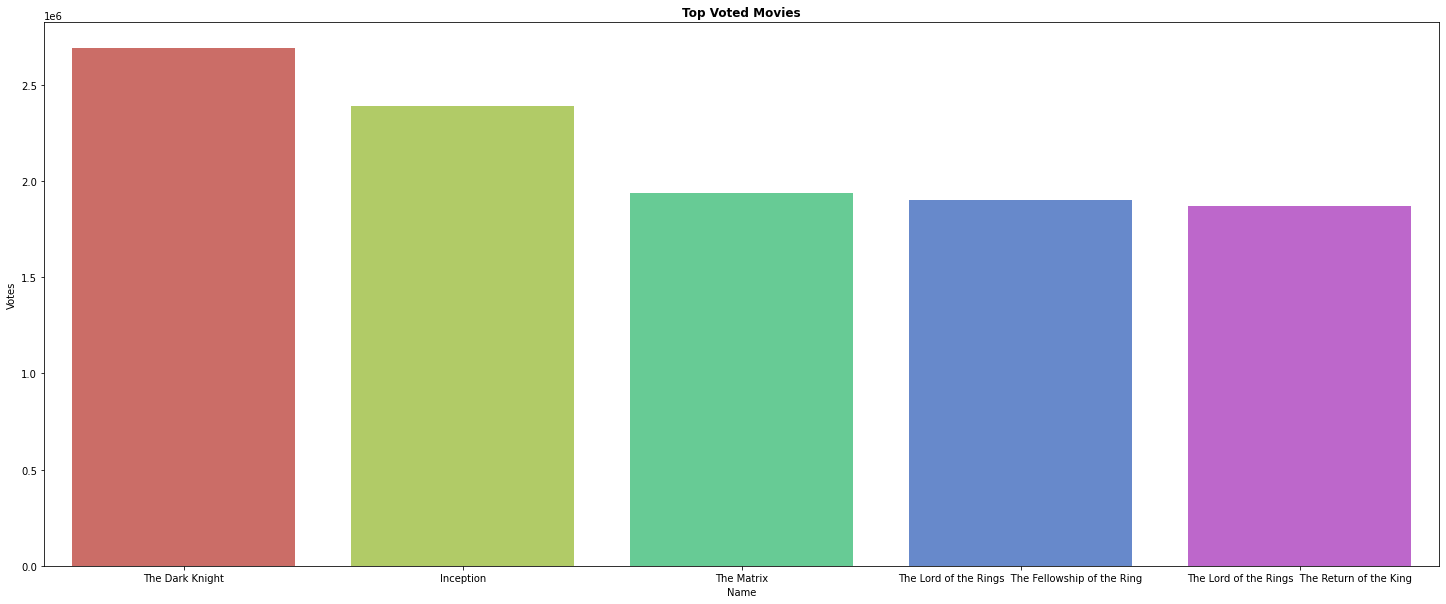

In [66]:
# Let us see the top 5 voted movies using bivariate analysis
top_voted = df.sort_values(['Votes'], ascending = False)
plt.figure(figsize=(25, 10))
g=sns.barplot(x=top_voted['Name'][:5],y=top_voted['Votes'][:5], palette = 'hls')
g.set_title("Top Voted Movies", weight = "bold")
plt.show()


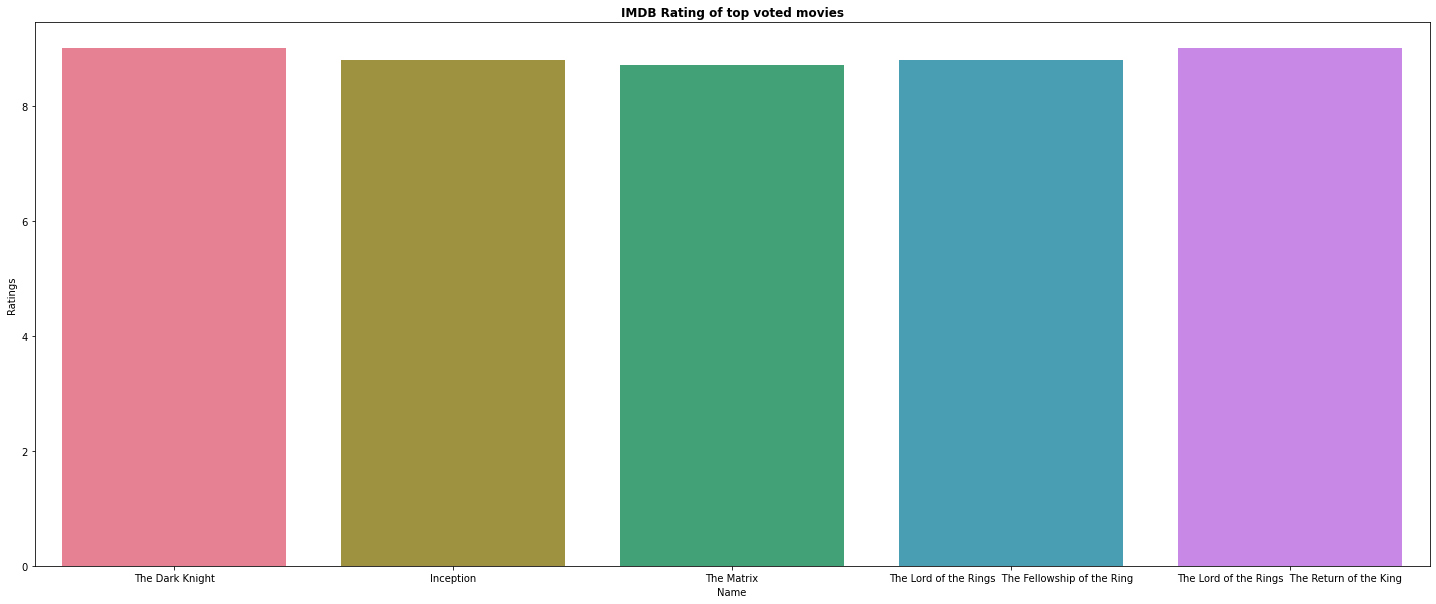

In [67]:
# Lets see the top 5 voted movies ratings
plt.figure(figsize=(25, 10))
g=sns.barplot(x=top_voted['Name'][:5],y=top_voted['Ratings'][:5], palette = 'husl')
g.set_title("IMDB Rating of top voted movies", weight = "bold")
plt.show()

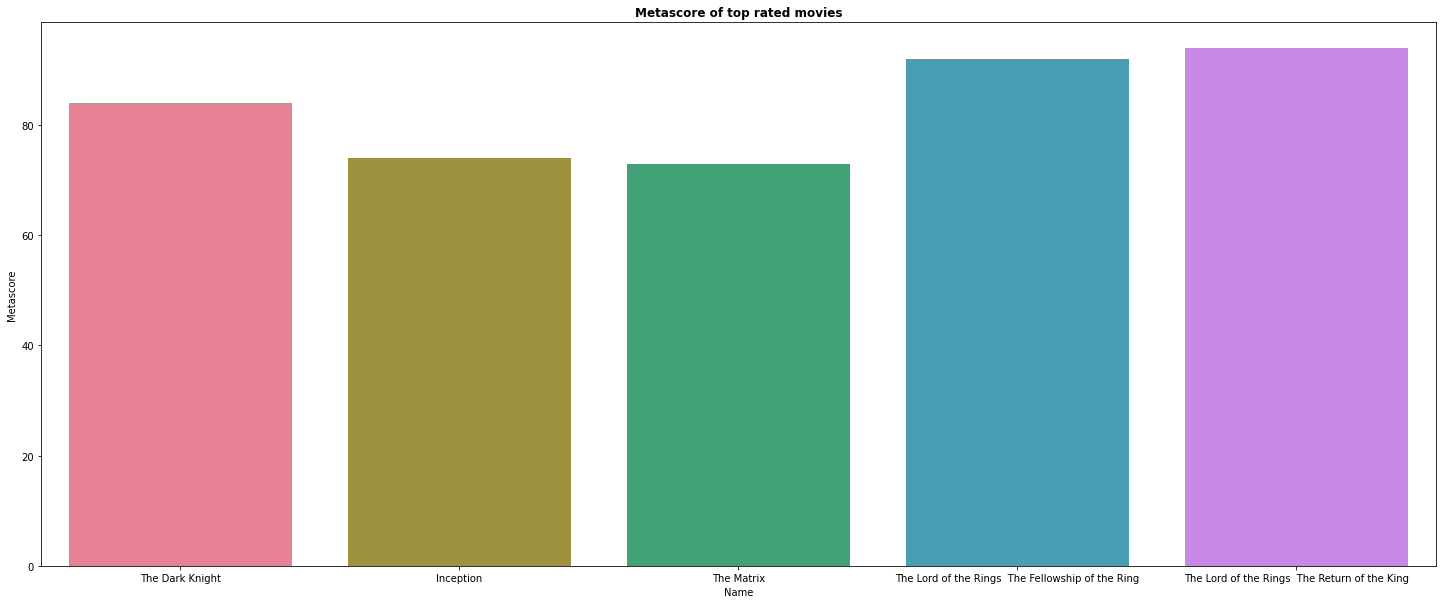

In [68]:
# Lets see the metascore of this top 5 voted movies
plt.figure(figsize=(25, 10))
g=sns.barplot(x=top_voted['Name'][:5],y=top_voted['Metascore'][:5], palette = 'husl')
g.set_title("Metascore of top rated movies", weight = "bold")
plt.show()

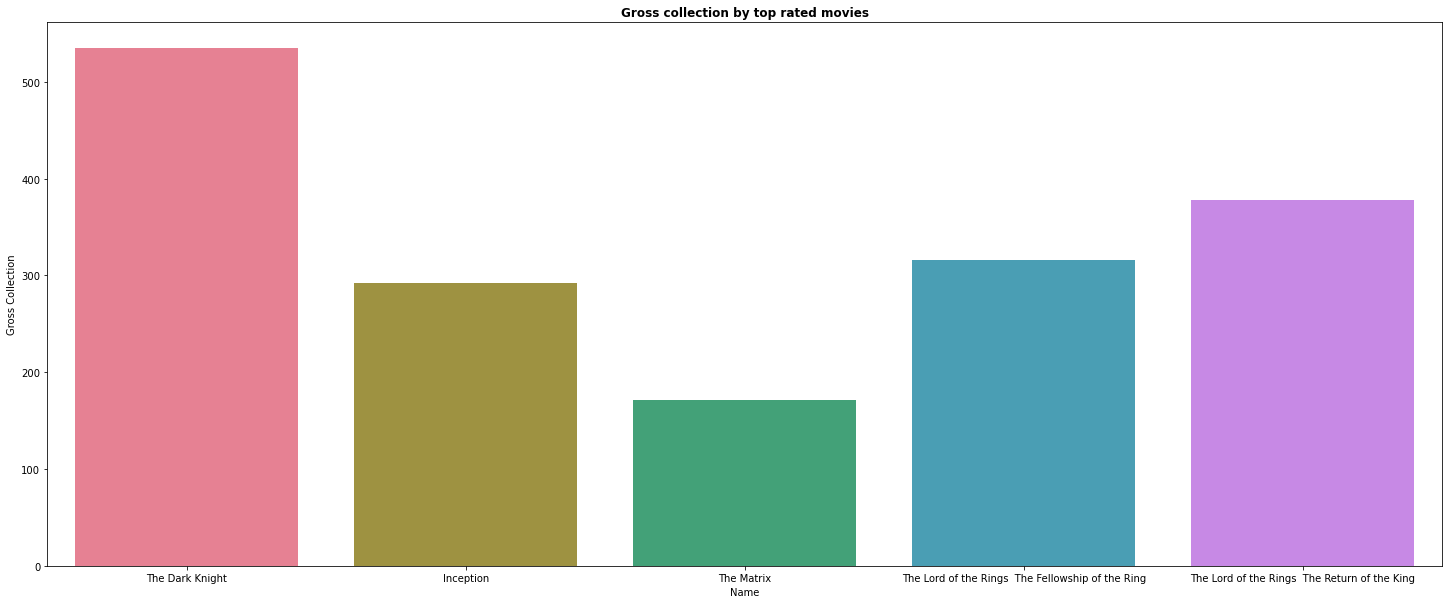

In [69]:
# Lets see the Gross Collection of this top 5 voted movies
plt.figure(figsize=(25, 10))
g=sns.barplot(x=top_voted['Name'][:5],y=top_voted['Gross Collection'][:5], palette = 'husl')
g.set_title("Gross collection by top rated movies", weight = "bold")
plt.show()

- The top voted five movies are 'The Dark Knight', 'Inception', ' The Matrix Name', 'The Lord of the Rings - The Fellowship of the Ring', And 'The Lord of the Rings - The Return of the king'.
- All five top voted movies ratated above 8.
- Also we can see this top voted movies metascore grater than 60. 
- If we see this top voted movies by earnings then the 'The Dark Knight' is in first position. And all other movies has earning greater than 150 Million dollers. 

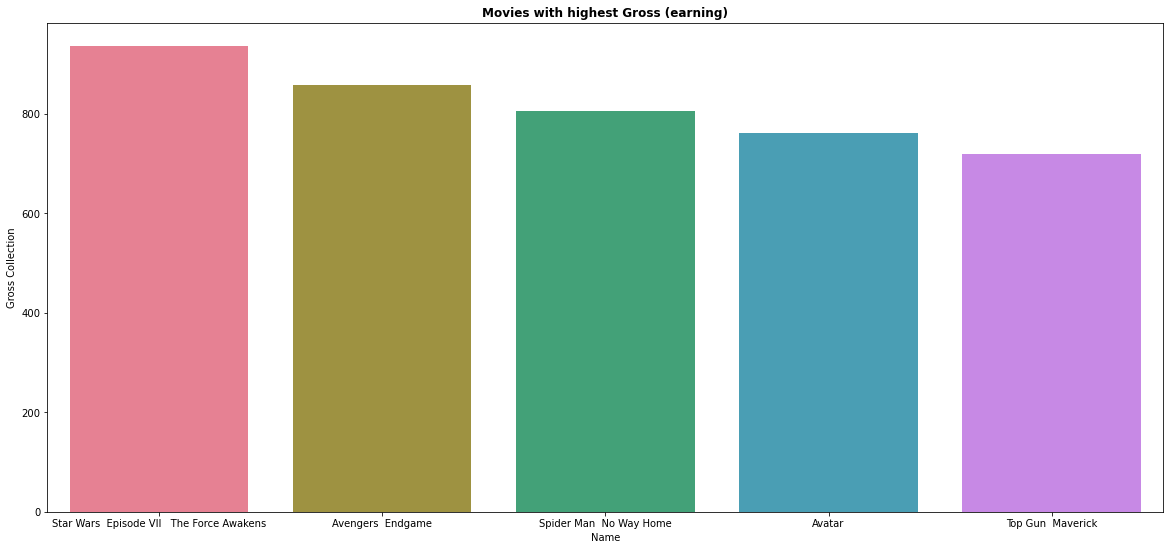

In [70]:
# Lets see the top movies by highest earnings
highest_earning = df.sort_values(['Gross Collection'], ascending = False)
plt.figure(figsize=(20, 9))
g=sns.barplot(x=highest_earning['Name'][:5],y=highest_earning['Gross Collection'][:5], palette = 'husl')
g.set_title("Movies with highest Gross (earning)", weight = "bold")
plt.show()

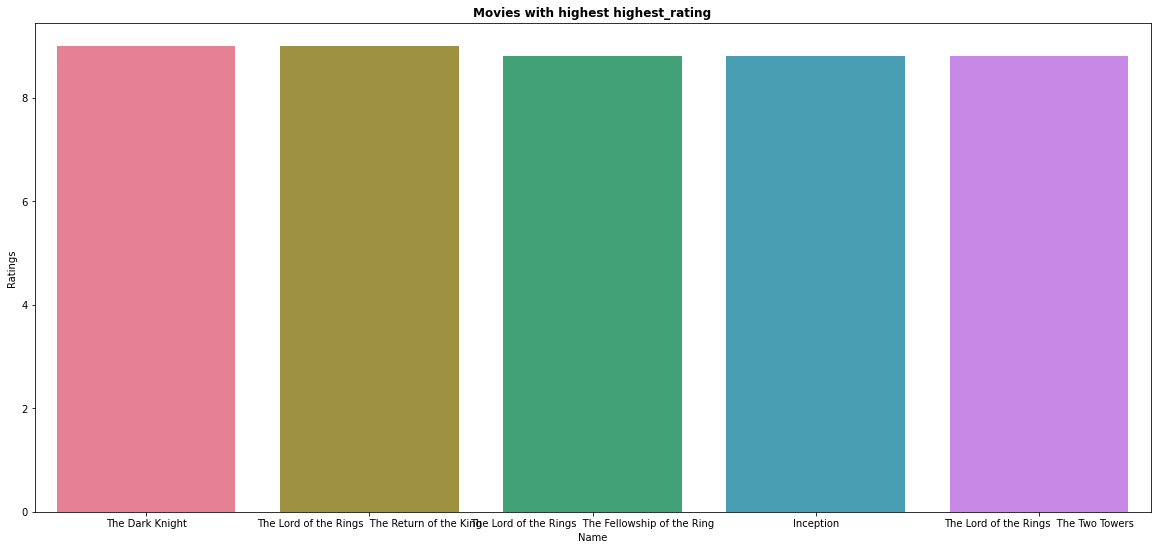

In [71]:
# Lets see the top movies by ratings
plt.figure(figsize=(20, 9))
highest_rating = df.sort_values(['Ratings'], ascending = False)
g=sns.barplot(x=highest_rating['Name'][:5],y=highest_rating['Ratings'][:5], palette = 'husl')
g.set_title("Movies with highest highest_rating", weight = "bold")
plt.show()

- 'Star Wars Episode VII The Force Awakens', 'Avengers Endgame', 'Spider Man No Way Home Name', 'Avatar', 'Top Gun Maverick' movies has highest earning but they are not in the list of top voted movies.
- Also we can observe top voted movies gross collection is not more than 600 million dollers but they still in the list of top votes and top rated 5 movies.

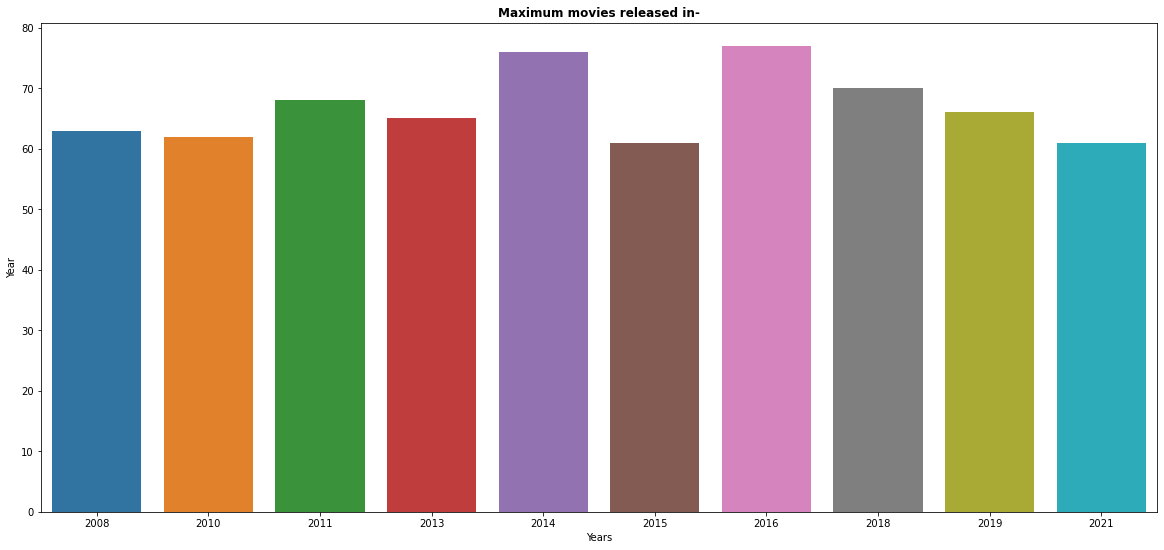

In [72]:
# lets see the Maximum movies released years using Univariate analysis
plt.figure(figsize=(20, 9))
g=sns.barplot(x=df['Year'].value_counts()[:10].index,y=df['Year'].value_counts()[:10])
g.set_title("Maximum movies released in-", weight = "bold")
g.set_xlabel("Years")
plt.show()

- In the year of 2016, 2014,2013 and 2011 maximum number of movies are realesed. 

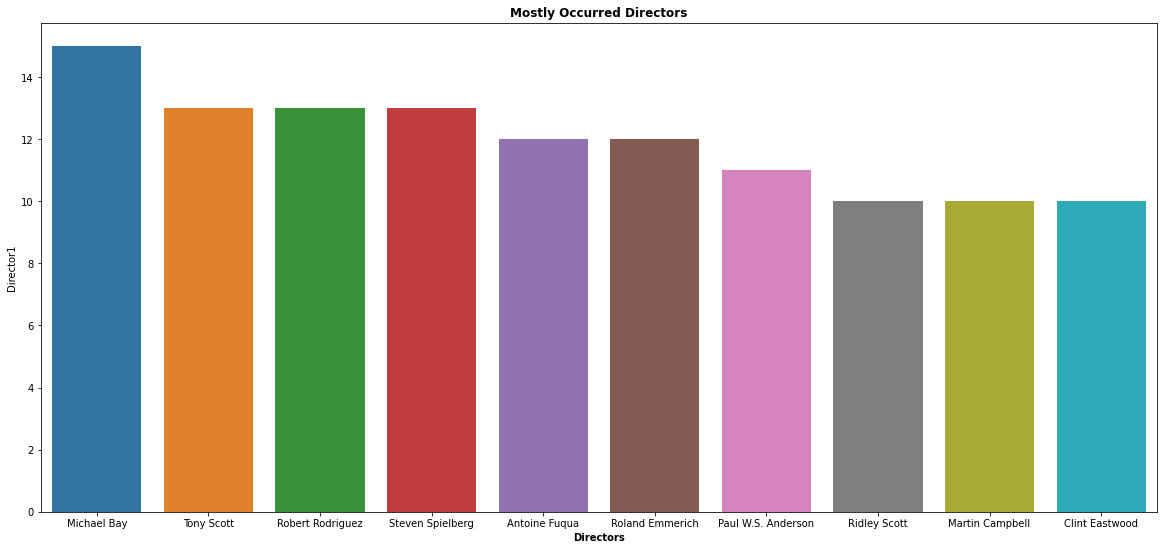

In [73]:
plt.figure(figsize=(20, 9))
g=sns.barplot(x=df['Director1'].value_counts().index[0:10],y=df['Director1'].value_counts()[:10])
g.set_title("Mostly Occurred Directors", weight = "bold")
g.set_xlabel("Directors", weight = "bold")
plt.show()

- Director 'Michael Bay' directed maximum number of movies i.e 13+ movies than other directors. 

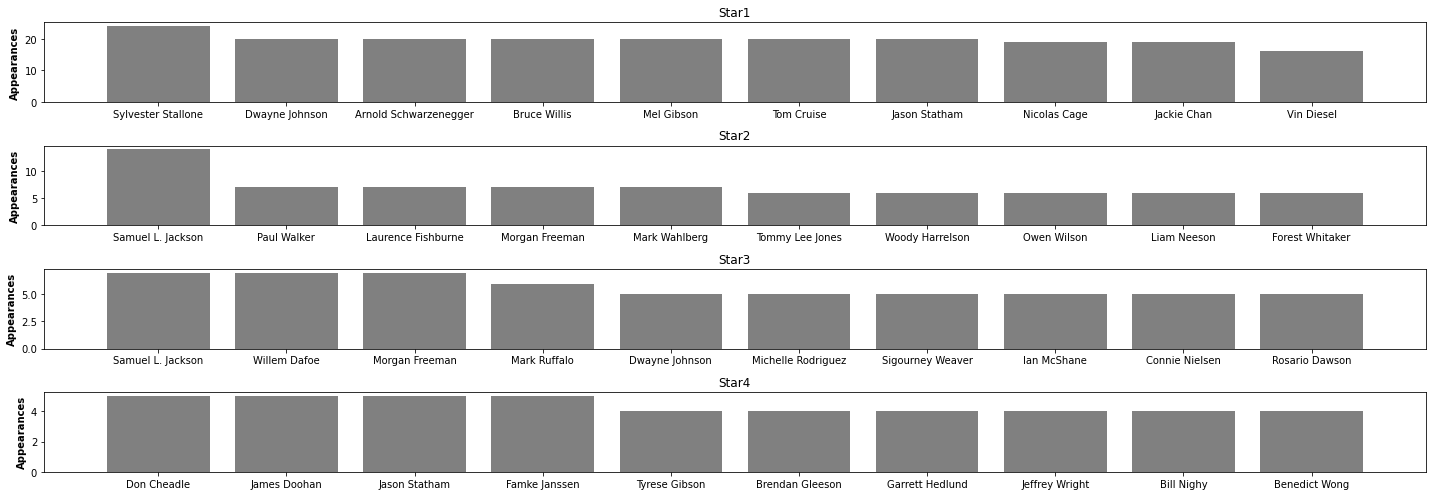

In [74]:
# Lets see the Stars with most Occurences in movies using multivariate analysis
stars=['Star1','Star2','Star3','Star4']
fig,axs=plt.subplots(4,1,figsize=(20,7))
ax=0
for x in stars:
    axs[ax].bar(df[x].value_counts()[:10].index,df[x].value_counts()[:10],color = 'Gray')
    axs[ax].set_title(x)
    axs[ax].set_ylabel("Appearances", weight = "bold")
    ax+=1
    plt.tight_layout()

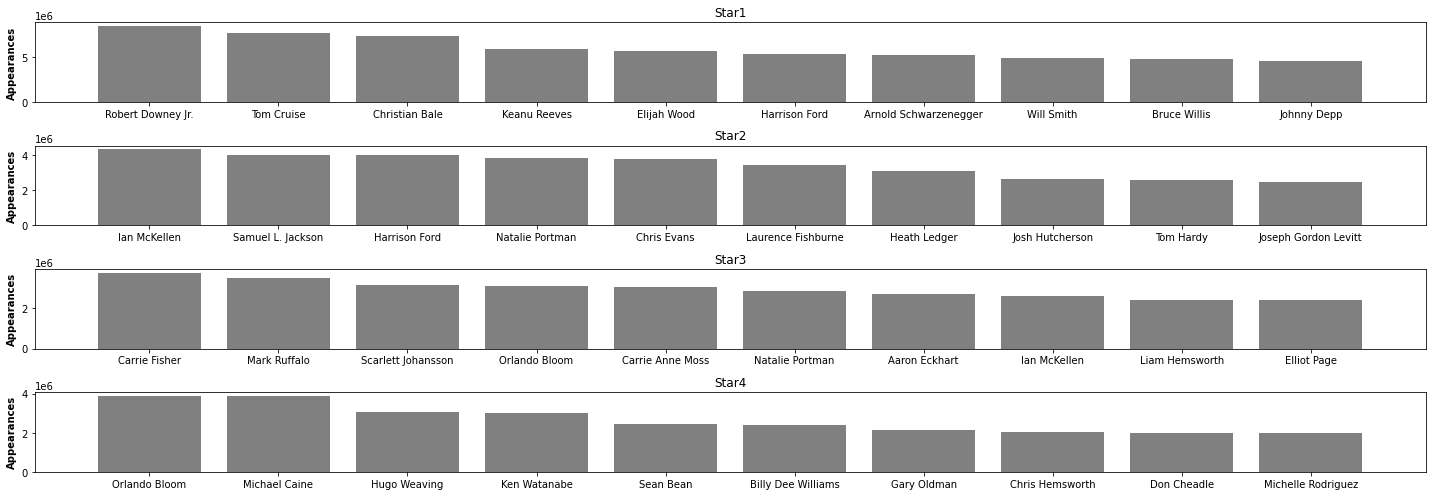

In [75]:
# Lets see the appearances of Stars in Top voted movies
stars=['Star1','Star2','Star3','Star4']
fig,axs=plt.subplots(4,1,figsize=(20,7))
ax=0
for x in stars:
    s=df.groupby([x]).sum().reset_index()
    d=s.sort_values(['Votes'],ascending=False)[:10]
    axs[ax].bar(d[x],d['Votes'],color = 'Gray')
    axs[ax].set_title(x)
    axs[ax].set_ylabel("Appearances", weight = "bold")
    ax+=1
    plt.tight_layout()

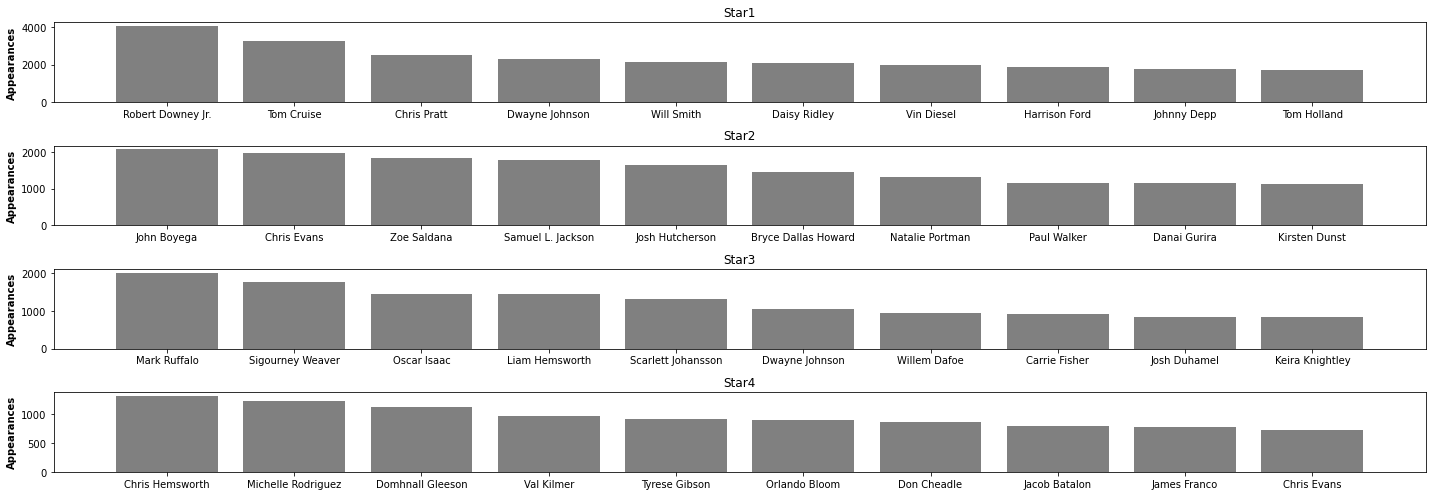

In [76]:
# Lets see the appearances of Stars in top grossed movies
stars=['Star1','Star2','Star3','Star4']
fig,axs=plt.subplots(4,1,figsize=(20,7))
ax=0
for x in stars:
    s=df.groupby([x]).sum().reset_index()
    d=s.sort_values(['Gross Collection'],ascending=False)[:10]
    axs[ax].bar(d[x],d['Gross Collection'],color = 'Gray')
    axs[ax].set_title(x)
    axs[ax].set_ylabel("Appearances", weight = "bold")
    ax+=1
    plt.tight_layout()

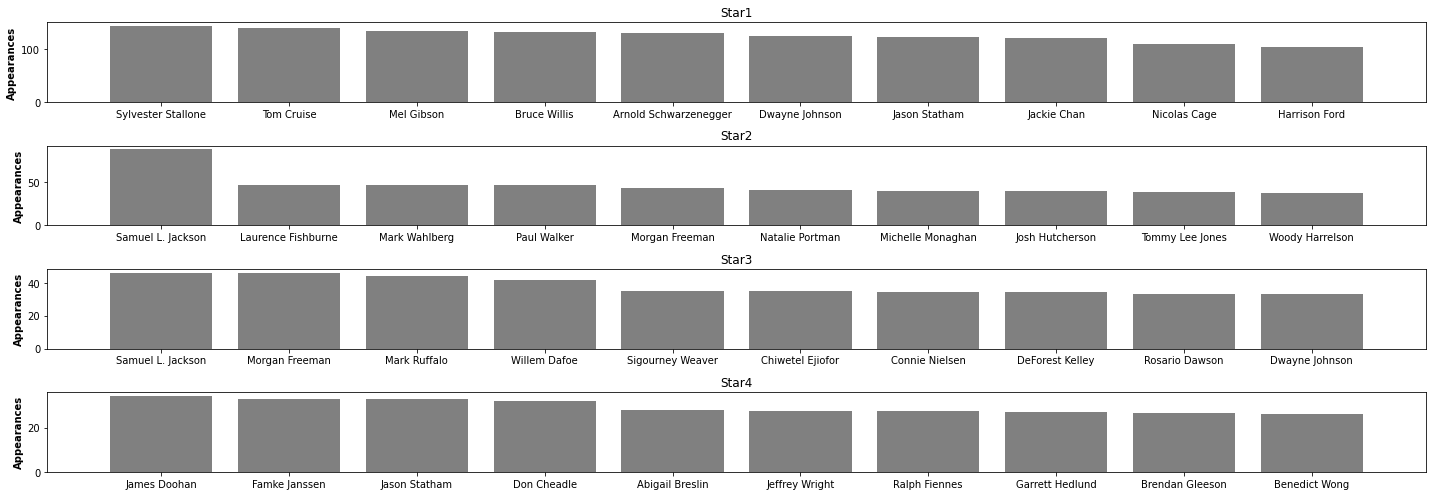

In [77]:
# Lets see the appearances of Stars in top rated movies
stars=['Star1','Star2','Star3','Star4']
fig,axs=plt.subplots(4,1,figsize=(20,7))
ax=0
for x in stars:
    s=df.groupby([x]).sum().reset_index()
    d=s.sort_values(['Ratings'],ascending=False)[:10]
    axs[ax].bar(d[x],d['Ratings'], color = 'Gray')
    axs[ax].set_title(x)
    axs[ax].set_ylabel("Appearances", weight = "bold")
    ax+=1
    plt.tight_layout()

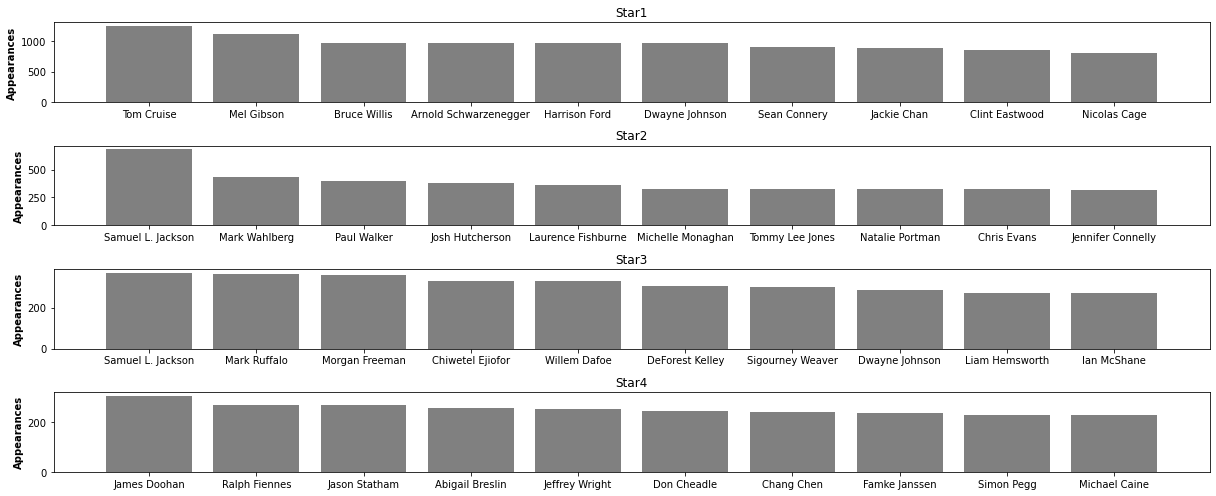

In [78]:
# Lets see the appearances of Stars in top meta_scores
stars=['Star1','Star2','Star3','Star4']
fig,axs=plt.subplots(4,1,figsize=(17,7))
ax=0
for x in stars:
    s=df.groupby([x]).sum().reset_index()
    d=s.sort_values(['Metascore'],ascending=False)[:10]
    axs[ax].bar(d[x],d['Metascore'],color = 'Gray')
    axs[ax].set_title(x)
    axs[ax].set_ylabel("Appearances", weight = "bold")
    ax+=1
    plt.tight_layout()


- The star 'Samuel L. Jackson' working on lots of movies and people rated his movies with good ratings and metascore.
- According to Gross collection and votings star 'Robert Downey Jr.' is in highest position from all other stars. 
- People gives maximum votes for his movies. 

C:\Users\pooja sinalkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


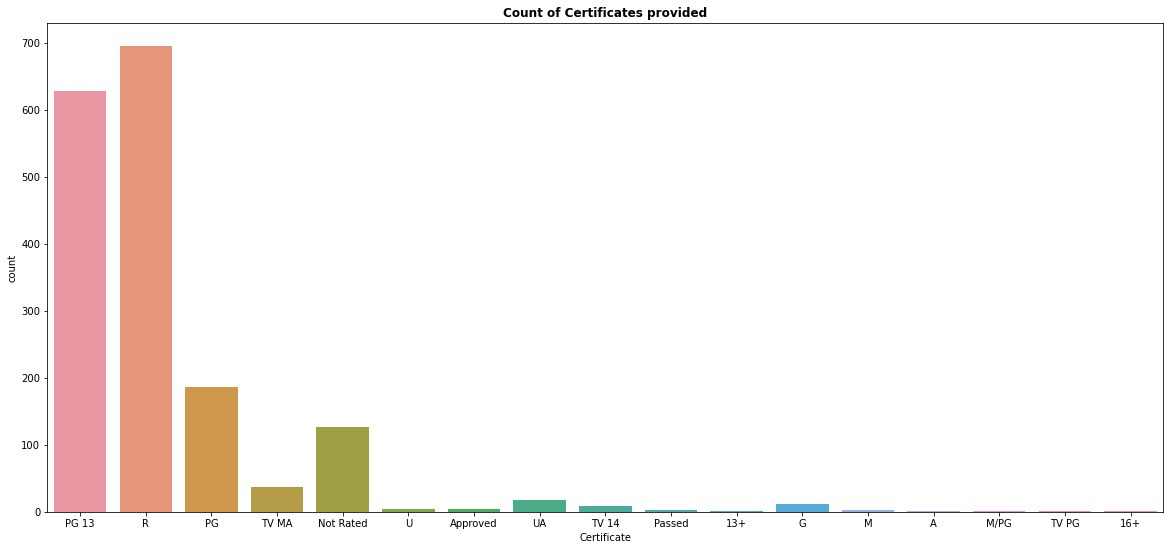

In [79]:
plt.figure(figsize=(20, 9))
g=sns.countplot(df['Certificate'])
g.set_title("Count of Certificates provided", weight = "bold")
plt.show()

- Mostaly achieved certificates by movies are 'PG 13', 'R' and 'PG'.

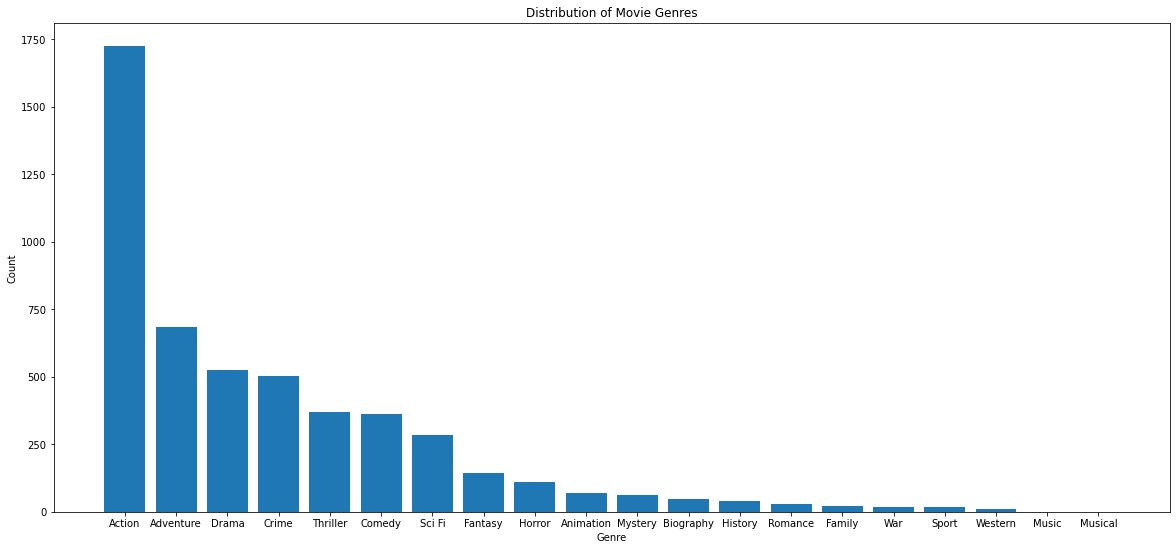

In [80]:
plt.figure(figsize=(20, 9))
genre_counts = pd.concat([df['Genre1'], df['Genre2'], df['Genre3']]).value_counts()
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Movie Genres')
plt.show()

In [81]:
df_by_genre1 = df.groupby('Genre1')
df_by_genre2 = df.groupby('Genre2')
df_by_genre3 = df.groupby('Genre3')
agg_genre1=df_by_genre1.sum()
agg_genre2=df_by_genre2.sum()
agg_genre3=df_by_genre3.sum()
ge1_ge2 = agg_genre1.add(agg_genre2,fill_value=0.0)# fill the missing values with 0.0 before adding the two columns.
final_genre = ge1_ge2.add(agg_genre3,fill_value=0.0)# fill the missing values with 0.0 before adding the two columns.
genre_temp=final_genre.reset_index().head(10)
genre_temp

,index,Year,Duration in min,Metascore,Votes,Ratings,Gross Collection
0,Action,3460179.0,198680.0,82484.0,311198339.0,11177.3,113110.58
1,Adventure,1376027.0,80237.0,35732.0,157651684.0,4427.5,69767.80
2,Animation,136607.0,6705.0,3951.0,9799680.0,481.7,5335.32
3,Biography,98450.0,6174.0,2580.0,6156737.0,353.8,1499.13
4,Comedy,728103.0,39141.0,15961.0,47274253.0,2262.3,20166.44
5,Crime,1010581.0,56755.0,22713.0,64992861.0,3286.4,18931.08
6,Drama,1055516.0,64303.0,25246.0,82386664.0,3561.8,21866.36
7,Family,46012.0,2623.0,1134.0,3236871.0,137.7,2037.19
8,Fantasy,289205.0,16795.0,6442.0,35899292.0,875.4,15289.29
9,History,78419.0,5259.0,1791.0,4362193.0,271.1,1339.13


- Action is Genre which found is Maximum movies.
- After grouping and adding all the Genre we observe that Action has the maximum Revenue, Ratings, Votes and Metascore.
- Adventure movies are on second position according to Votes, Rating and Gross Collection.
- Peoples also like to watch Comedy,Crime,Drama and Fantasy movies but Crime movies Revenue is less than other three Genre.

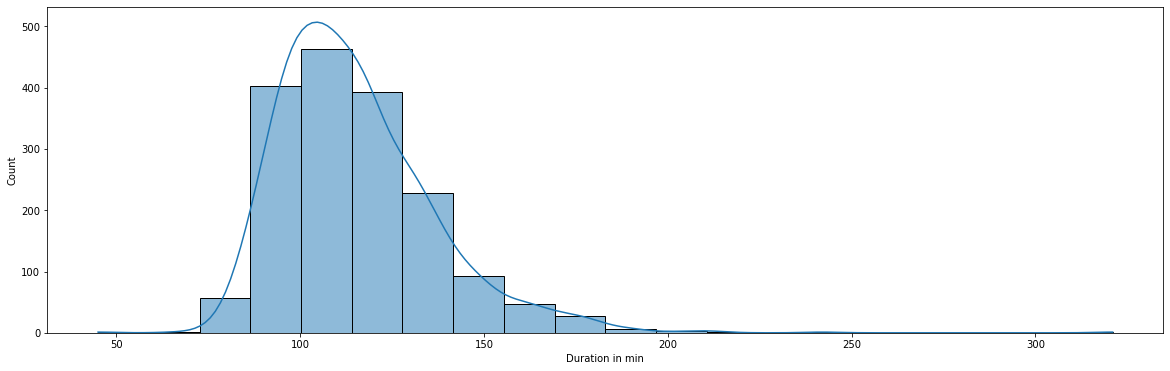

In [82]:
# Create a histogram of the duration of movies 
plt.figure(figsize=(20, 6))
sns.histplot(data=df, x='Duration in min', bins=20, kde=True)
plt.show()

- Most of Movies Belongs to Duration Range between 80 to 130 Minutes !

In [83]:
list(df['Metascore'])

[84.0,
 94.0,
 92.0,
 74.0,
 87.0,
 73.0,
 82.0,
 nan,
 90.0,
 75.0,
 98.0,
 85.0,
 nan,
 64.0,
 67.0,
 nan,
 78.0,
 85.0,
 78.0,
 68.0,
 87.0,
 77.0,
 84.0,
 nan,
 78.0,
 76.0,
 58.0,
 98.0,
 76.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 71.0,
 68.0,
 78.0,
 70.0,
 69.0,
 72.0,
 66.0,
 71.0,
 65.0,
 62.0,
 72.0,
 96.0,
 89.0,
 nan,
 93.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 90.0,
 63.0,
 81.0,
 84.0,
 84.0,
 77.0,
 74.0,
 75.0,
 85.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 89.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 74.0,
 81.0,
 76.0,
 76.0,
 65.0,
 54.0,
 69.0,
 80.0,
 90.0,
 67.0,
 85.0,
 83.0,
 59.0,
 nan,
 87.0,
 75.0,
 33.0,
 nan,
 64.0,
 71.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 81.0,
 83.0,
 83.0,
 71.0,
 79.0,
 82.0,
 74.0,
 94.0,
 84.0,
 60.0,
 81.0,
 68.0,
 75.0,
 98.0,
 65.0,
 76.0,
 85.0,
 89.0,
 71.0,
 97.0,
 69.0,
 nan,
 nan,
 nan,
 67.0,
 76.0,
 72.0,
 51.0,
 87.0,
 65.0,
 47.0,
 78.0,
 94.0,
 80.0,
 68.0,
 71.0,
 82.0,
 75.0,
 66.0,
 81.0,
 70.0,
 81.0,
 51.0,
 79.0,
 67.

In [84]:
df['Metascore'] = df['Metascore'].interpolate().astype(int)

- We use interpolation method because it is a method of estimating values between two known values based on some assumed relationship between the values.

In [85]:
list(df['Metascore'])

[84,
 94,
 92,
 74,
 87,
 73,
 82,
 86,
 90,
 75,
 98,
 85,
 74,
 64,
 67,
 72,
 78,
 85,
 78,
 68,
 87,
 77,
 84,
 81,
 78,
 76,
 58,
 98,
 76,
 75,
 74,
 73,
 73,
 72,
 71,
 71,
 68,
 78,
 70,
 69,
 72,
 66,
 71,
 65,
 62,
 72,
 96,
 89,
 91,
 93,
 92,
 92,
 91,
 91,
 91,
 90,
 90,
 90,
 63,
 81,
 84,
 84,
 77,
 74,
 75,
 85,
 85,
 86,
 87,
 87,
 88,
 89,
 86,
 84,
 82,
 80,
 78,
 76,
 74,
 81,
 76,
 76,
 65,
 54,
 69,
 80,
 90,
 67,
 85,
 83,
 59,
 73,
 87,
 75,
 33,
 48,
 64,
 71,
 72,
 73,
 75,
 76,
 78,
 79,
 81,
 83,
 83,
 71,
 79,
 82,
 74,
 94,
 84,
 60,
 81,
 68,
 75,
 98,
 65,
 76,
 85,
 89,
 71,
 97,
 69,
 68,
 68,
 67,
 67,
 76,
 72,
 51,
 87,
 65,
 47,
 78,
 94,
 80,
 68,
 71,
 82,
 75,
 66,
 81,
 70,
 81,
 51,
 79,
 67,
 55,
 74,
 74,
 77,
 64,
 64,
 65,
 63,
 61,
 82,
 79,
 76,
 74,
 61,
 66,
 86,
 60,
 69,
 94,
 72,
 86,
 76,
 47,
 61,
 65,
 83,
 44,
 74,
 76,
 68,
 73,
 87,
 87,
 78,
 84,
 73,
 75,
 93,
 77,
 68,
 59,
 68,
 77,
 87,
 72,
 58,
 64,
 70,
 76,
 82,
 82,


In [86]:
list(df['Genre2'])

['Crime',
 'Adventure',
 'Adventure',
 'Adventure',
 'Adventure',
 'Sci Fi',
 'Adventure',
 'Drama',
 'Adventure',
 'Sci Fi',
 'Drama',
 'Drama',
 'Drama',
 'Crime',
 'Adventure',
 'Adventure',
 'Adventure',
 'Adventure',
 'Drama',
 'Adventure',
 'Action',
 'Drama',
 'Adventure',
 'Drama',
 'Drama',
 'Crime',
 'Adventure',
 'Adventure',
 'Action',
 'Adventure',
 'Crime',
 'Crime',
 'Biography',
 'Biography',
 'Crime',
 'Adventure',
 'Adventure',
 'Drama',
 'Crime',
 'Crime',
 'Thriller',
 'Comedy',
 'Drama',
 'Adventure',
 'Drama',
 'Action',
 'Drama',
 'Comedy',
 'Drama',
 'Drama',
 'Crime',
 'Drama',
 'Crime',
 'Comedy',
 'Drama',
 'Drama',
 'Biography',
 'Adventure',
 'Adventure',
 'Biography',
 'Drama',
 'Sci Fi',
 'Drama',
 'Biography',
 'Action',
 'Action',
 'Action',
 'Adventure',
 'Comedy',
 'Crime',
 'Adventure',
 'Adventure',
 'Biography',
 'Adventure',
 'Crime',
 'Drama',
 'Drama',
 'Thriller',
 'Adventure',
 'Drama',
 'Adventure',
 'Adventure',
 'Comedy',
 'Adventure',
 'Sc

In [87]:
list(df['Genre3'])

['Drama',
 'Drama',
 'Drama',
 'Sci Fi',
 'Drama',
 nan,
 'Fantasy',
 nan,
 'Fantasy',
 nan,
 nan,
 'Mystery',
 'Mystery',
 'Drama',
 'Drama',
 'Crime',
 'Drama',
 nan,
 'Thriller',
 'Sci Fi',
 'Adventure',
 'Mystery',
 'Sci Fi',
 nan,
 nan,
 'Drama',
 'Fantasy',
 'Mystery',
 'Adventure',
 'Drama',
 'Thriller',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Fantasy',
 'Sci Fi',
 'War',
 'Drama',
 'Drama',
 nan,
 'Crime',
 'Sport',
 nan,
 'Sci Fi',
 'Adventure',
 'War',
 'Crime',
 'Fantasy',
 'Thriller',
 'Drama',
 nan,
 'Drama',
 'Romance',
 'War',
 'History',
 'Crime',
 'Sci Fi',
 'Fantasy',
 'Drama',
 'Sci Fi',
 nan,
 'Sci Fi',
 'Drama',
 'Adventure',
 'Adventure',
 'Drama',
 'Comedy',
 'Crime',
 'Drama',
 'Comedy',
 'Drama',
 'Drama',
 'Comedy',
 'Drama',
 nan,
 'Thriller',
 nan,
 'Drama',
 'Mystery',
 'Comedy',
 'Drama',
 nan,
 'Fantasy',
 nan,
 'Thriller',
 'Adventure',
 'Drama',
 'Thriller',
 'Thriller',
 'Drama',
 'Fantasy',
 'Adventure',
 'Drama',
 'Drama',
 'Drama',
 'War',
 'Drama

In [88]:
df['Genre2'].fillna(df['Genre2'].mode()[0],inplace = True)
df['Genre3'].fillna(df['Genre3'].mode()[0],inplace = True)

In [89]:
df['Star2'].fillna(df['Star2'].mode()[0],inplace = True)
df['Star3'].fillna(df['Star3'].mode()[0],inplace = True)
df['Star4'].fillna(df['Star4'].mode()[0],inplace = True)

In [90]:
df.isnull().sum()

Name                  0
Year                  0
Duration in min       0
Metascore             0
Director1             0
Votes                 0
Ratings               0
Gross Collection    264
Certificate           0
Genre1                0
Genre2                0
Genre3                0
Star1                 0
Star2                 0
Star3                 0
Star4                 0
dtype: int64

## As Gross Collection is our target coulmn and it has some null values before taking a decision to remove it lets analyse that data

In [91]:
# Store the data in missing values whose Gross Collection is null
missing_values = df.loc[df['Gross Collection'].isna()]
missing_values

,Name,Year,Duration in min,Metascore,Director1,Votes,Ratings,Gross Collection,Certificate,Genre1,Genre2,Genre3,Star1,Star2,Star3,Star4
7,Soorarai Pottru,2020,153,86,Sudha Kongara,118670,8.7,NaN,TV MA,Action,Drama,Drama,Suriya,Paresh Rawal,Aparna Balamurali,Mohan Babu
11,Harakiri,1962,133,85,Masaki Kobayashi,59585,8.6,NaN,Not Rated,Action,Drama,Mystery,Tatsuya Nakadai,Akira Ishihama,Shima Iwashita,Tetsurô Tanba
12,Sita Ramam,2022,163,74,Hanu Raghavapudi,57562,8.6,NaN,U,Action,Drama,Mystery,Dulquer Salmaan,Mrunal Thakur,Rashmika Mandanna,Sumanth
15,Kaithi,2019,145,72,Lokesh Kanagaraj,34851,8.5,NaN,Not Rated,Action,Adventure,Crime,Karthi,Narain,Arjun Das,George Maryan
23,Asuran,2019,141,81,Vetrimaaran,30705,8.4,NaN,Not Rated,Action,Drama,Drama,Dhanush,Manju Warrier,Prakash Raj,Pasupathy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,The Prototype,2022,97,12,Marcelo Grion,31600,2.4,NaN,Not Rated,Action,Sci Fi,Thriller,Mark Vasconcellos,Frank Spinelli,Victoria De Mare,Juan Antonio Devoto
1720,Radhe,2021,135,15,Prabhu Deva,178384,1.9,NaN,TV MA,Action,Crime,Thriller,Salman Khan,Disha Patani,Randeep Hooda,Jackie Shroff
1722,Angels Apocalypse,2015,85,15,Sean Cain,42900,1.6,NaN,Not Rated,Action,Fantasy,Sci Fi,Enzo Zelocchi,Jana Rochelle,Ryan C.F. Buckley,William Kirkham
1723,The Cost of Deception,2021,125,15,Keith English,39237,1.5,NaN,Not Rated,Action,Crime,Drama,Vivianne Bánovits,András Mózes,Barna Bokor,Gabriella Gubás


In [92]:
missing_values.corr()

,Year,Duration in min,Metascore,Votes,Ratings,Gross Collection
Year,1.000000,0.167747,-0.344645,0.104935,-0.300274,NaN
Duration in min,0.167747,1.000000,0.246424,0.193486,0.264667,NaN
Metascore,-0.344645,0.246424,1.000000,0.086743,0.822846,NaN
Votes,0.104935,0.193486,0.086743,1.000000,0.103111,NaN
Ratings,-0.300274,0.264667,0.822846,0.103111,1.000000,NaN
Gross Collection,NaN,NaN,NaN,NaN,NaN,NaN


- The year of the movie has a weak negative correlation with the metascore and ratings of the movie, which suggests that older movies may be less highly rated than newer movies.

- The duration of the movie has a weak positive correlation with the metascore, ratings, which suggests that longer movies may be more highly rated and more successful at the box office.

- The metascore and ratings have a strong positive correlation, which suggests that they may be measuring similar aspects of the movie's quality.

In [93]:
missing_values['Year'].value_counts()

2022    39
2021    37
2020    26
2019    22
2018    15
2017    12
2016    10
2014     9
2012     9
2015     8
2009     7
2023     7
2011     6
2010     5
2008     5
2007     4
2013     4
2005     3
2000     3
1993     2
1962     2
1979     2
1998     1
2002     1
1978     1
1980     1
2004     1
1966     1
1984     1
1971     1
1969     1
1976     1
1988     1
1989     1
1968     1
1948     1
1932     1
1992     1
1973     1
1967     1
1972     1
1994     1
1999     1
1975     1
1958     1
1949     1
1997     1
1961     1
2006     1
Name: Year, dtype: int64

- If we drop values accrodingly Gross Collection then we are lossing the lots of data of the movies which are released in between 2016 to 2022. 

C:\Users\pooja sinalkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


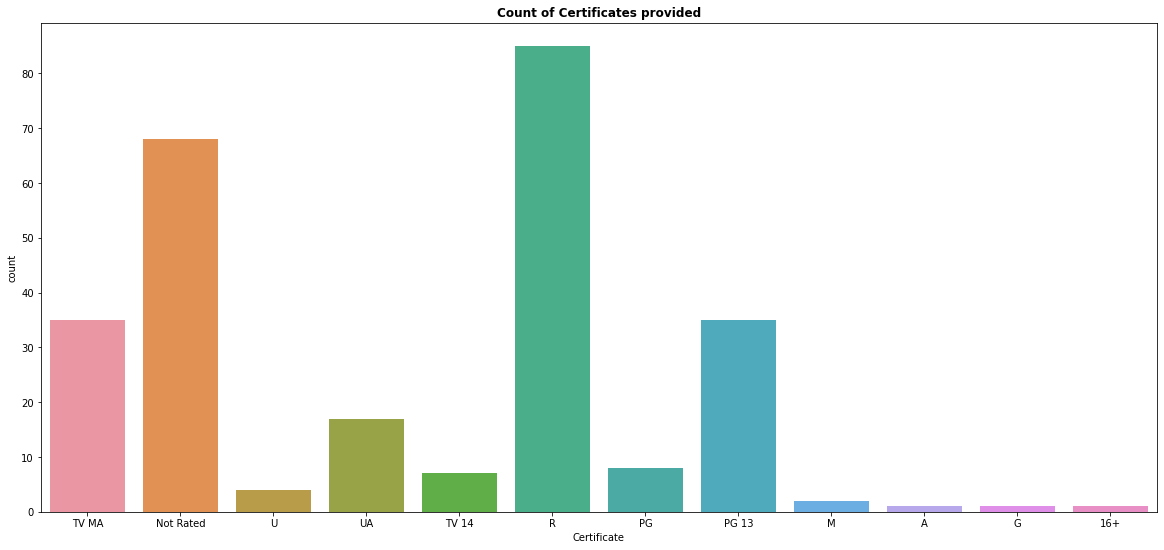

In [94]:
plt.figure(figsize=(20, 9))
g=sns.countplot(missing_values['Certificate'])
g.set_title("Count of Certificates provided", weight = "bold")
plt.show()

- According to our previous graph of Certificate we have maximum count for PG 13 and R certificates and all other certificates has less count. If we drop missing_values data then We loss details of movies which awarded by certificates like PG 13, PG, R which has maximum count. 

In [95]:
missing_values['Genre1'].value_counts()

Action       255
Animation      9
Name: Genre1, dtype: int64

In [96]:
missing_values['Genre2'].value_counts()

Adventure    64
Crime        58
Drama        48
Comedy       43
Thriller     22
Biography    10
Action        9
Sci Fi        5
Horror        3
Fantasy       2
Name: Genre2, dtype: int64

In [97]:
missing_values['Genre3'].value_counts()

Drama        110
Thriller      37
Crime         31
Comedy        13
History       11
Sci Fi        10
Fantasy        9
Horror         9
Mystery        7
Adventure      7
Romance        7
War            6
Biography      3
Western        2
Sport          1
Musical        1
Name: Genre3, dtype: int64

- If we drop the missing_values data we loss the high count of Action, Drama and Adventure Genres.  

- If we loss 15.30% of data then we loss lots of important information. Droping the missing values accordingly target coulumn is not a right decision in this case.

In [98]:
list(df['Gross Collection'])

[534.86,
 377.85,
 315.54,
 292.58,
 342.55,
 171.48,
 290.48,
 nan,
 322.74,
 204.84,
 0.27,
 nan,
 nan,
 19.5,
 187.71,
 nan,
 858.37,
 248.16,
 448.14,
 678.82,
 190.24,
 0.71,
 85.16,
 nan,
 718.73,
 67.44,
 309.13,
 13.28,
 2.38,
 nan,
 nan,
 6.6,
 12.39,
 nan,
 nan,
 804.75,
 402.45,
 159.23,
 206.85,
 70.1,
 83.01,
 3.9,
 13.66,
 197.17,
 70.51,
 47.7,
 4.14,
 nan,
 20.19,
 nan,
 nan,
 3.51,
 nan,
 0.98,
 nan,
 4.19,
 0.04,
 154.06,
 305.41,
 117.62,
 32.87,
 38.4,
 226.28,
 26.95,
 217.58,
 23.16,
 nan,
 8.18,
 nan,
 nan,
 1.03,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 108.33,
 92.05,
 333.18,
 183.64,
 363.07,
 nan,
 623.28,
 167.45,
 261.44,
 0.55,
 227.47,
 66.21,
 nan,
 6.74,
 nan,
 0.17,
 0.01,
 0.9,
 1.11,
 0.1,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 72.86,
 14.5,
 760.51,
 100.21,
 318.41,
 257.73,
 315.06,
 128.08,
 35.55,
 57.23,
 115.65,
 121.66,
 233.92,
 12.06,
 14.5,
 0.52,
 53.71,
 13.76,
 2.63,
 3.98,
 1.53,
 nan,
 nan,
 nan,
 659.68,
 nan,
 369.35,
 36.47,
 183.

In [99]:
# Interpolate missing values using linear interpolation
df['Gross Collection'] = df['Gross Collection'].interpolate(method='linear')

# Round values to 2 decimal places
df['Gross Collection'] = round(df['Gross Collection'], 2)


- We use interpolation method because it is a method of estimating values between two known values based on some assumed relationship between the values

In [100]:
list(df['Gross Collection'])

[534.86,
 377.85,
 315.54,
 292.58,
 342.55,
 171.48,
 290.48,
 306.61,
 322.74,
 204.84,
 0.27,
 6.68,
 13.09,
 19.5,
 187.71,
 523.04,
 858.37,
 248.16,
 448.14,
 678.82,
 190.24,
 0.71,
 85.16,
 401.95,
 718.73,
 67.44,
 309.13,
 13.28,
 2.38,
 3.79,
 5.19,
 6.6,
 12.39,
 276.51,
 540.63,
 804.75,
 402.45,
 159.23,
 206.85,
 70.1,
 83.01,
 3.9,
 13.66,
 197.17,
 70.51,
 47.7,
 4.14,
 12.16,
 20.19,
 14.63,
 9.07,
 3.51,
 2.24,
 0.98,
 2.58,
 4.19,
 0.04,
 154.06,
 305.41,
 117.62,
 32.87,
 38.4,
 226.28,
 26.95,
 217.58,
 23.16,
 15.67,
 8.18,
 5.8,
 3.41,
 1.03,
 14.44,
 27.86,
 41.27,
 54.68,
 68.09,
 81.5,
 94.92,
 108.33,
 92.05,
 333.18,
 183.64,
 363.07,
 493.17,
 623.28,
 167.45,
 261.44,
 0.55,
 227.47,
 66.21,
 36.47,
 6.74,
 3.46,
 0.17,
 0.01,
 0.9,
 1.11,
 0.1,
 10.49,
 20.89,
 31.28,
 41.68,
 52.07,
 62.47,
 72.86,
 14.5,
 760.51,
 100.21,
 318.41,
 257.73,
 315.06,
 128.08,
 35.55,
 57.23,
 115.65,
 121.66,
 233.92,
 12.06,
 14.5,
 0.52,
 53.71,
 13.76,
 2.63,
 3.98,
 

In [101]:
df.isnull().sum().sum()

0

In [102]:
# Creating a copy of data which is useful for prediction of Ratings
New_df = df.copy()

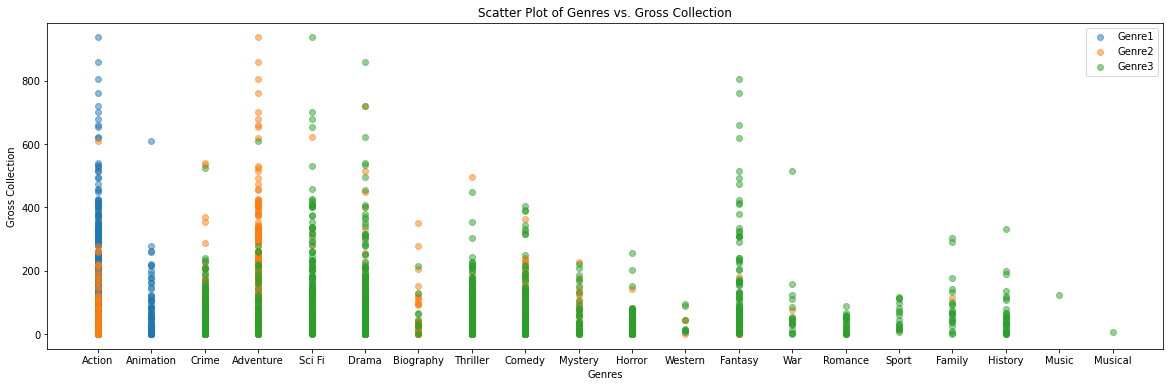

In [103]:
plt.figure(figsize=(20,6))
# Create scatter plot for Genre1
plt.scatter(df['Genre1'], df['Gross Collection'], alpha=0.5, label='Genre1')

# Create scatter plot for Genre2
plt.scatter(df['Genre2'], df['Gross Collection'], alpha=0.5, label='Genre2')

# Create scatter plot for Genre3
plt.scatter(df['Genre3'], df['Gross Collection'], alpha=0.5, label='Genre3')

# Add labels and title
plt.xlabel('Genres')
plt.ylabel('Gross Collection')
plt.title('Scatter Plot of Genres vs. Gross Collection')

# Add legend
plt.legend()

# Show plot
plt.show()


- By observing above graphs we can see that Gross Collection of Genre not varies according to the Genre. But here we are not taking the decision to drop genre even its not showing good relation with Gross Collection. Because Certain genres tend to be more popular with certain demographics or during specific times of the year.

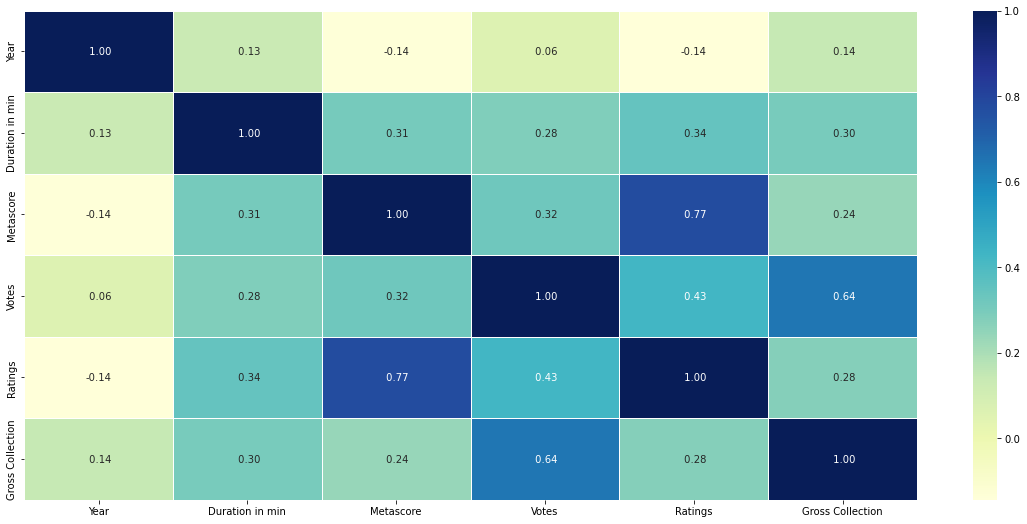

In [104]:
# Lets see the correlation 
plt.figure(figsize=(20,9))
sns.heatmap(df.corr(),annot= True,linewidths=1,fmt=' .2f',cmap="YlGnBu")
plt.show()

- There is a weak positive correlation (0.13) between Year and Duration in min, suggesting that movies released in more recent years tend to be slightly longer.
- There is a weak negative correlation (-0.14) between Year and Ratings, suggesting that movies released in more recent years tend to be slightly lower rated on average.
- There is a positive correlation between Duration in min and all other variables, with the strongest correlation being with Ratings (0.34), suggesting that longer movies tend to receive higher ratings, more votes, and make more money.
- There is a positive correlation between Votes and Gross Collection (0.68), suggesting that more popular movies tend to make more money.
- There is a positive correlation between Ratings and Gross Collection (0.28), suggesting that movies that are well-rated on IMDb tend to make more money.
- There is a weak positive correlation (0.26) between Metascore and Gross Collection, suggesting that movies with higher scores on Metascore tend to make slightly more money.
- There is a positive correlation between Duration in min and Gross Collection (0.33), suggesting that longer movies tend to make more money. 

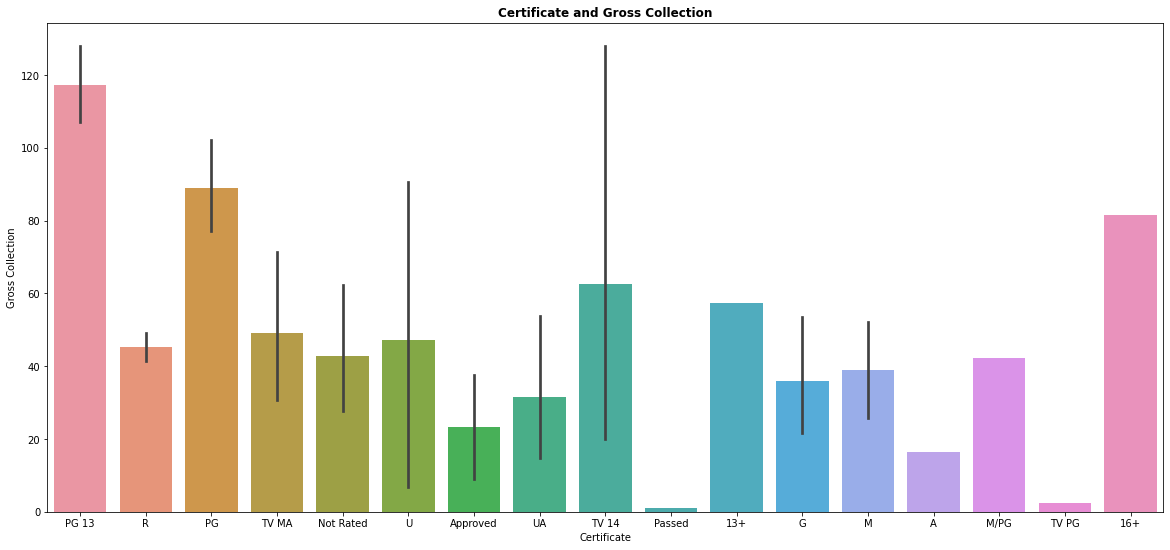

In [105]:
plt.figure(figsize=(20, 9))
g=sns.barplot(x=df['Certificate'],y=df['Gross Collection'])
g.set_title("Certificate and Gross Collection", weight = "bold")
plt.show()

- PG 13,PG,13+ certificates awarded movies has a highest Gross Collection than other certificates.

In [106]:
# Get the sorted list of directors by frequency count
sorted_directors = df['Director1'].value_counts().sort_values(ascending=False)

# Group the DataFrame by Director1 and calculate the sum of Gross Collection for each director
director_gross = df.groupby('Director1')['Gross Collection'].sum()

# Select only the directors whose names are in the sorted_directors index
sorted_director_gross = director_gross.loc[sorted_directors.index]

# Display the sorted list of directors with their gross collection
sorted_director_gross


Michael Bay          2370.80
Robert Rodriguez      650.95
Steven Spielberg     2314.51
Tony Scott            996.33
Antoine Fuqua         845.81
                      ...   
Ellory Elkayem         17.32
Fran Rubel Kuzui      125.31
Mathieu Kassovitz      22.53
Adam Shankman         113.09
Mahesh Bhatt            1.69
Name: Gross Collection, Length: 916, dtype: float64

- We can see Director who directed maximum movies does not mean achive the maximum Gross Collection for thier movies. Gross Collection is not showing strong relation with Director.

# Encoding the Categorical column

In [107]:
import category_encoders as ce
# Define the target column
target_col = "Gross Collection"

# Define the categorical columns to be encoded
cat_cols = ["Genre1", "Genre2", "Genre3", "Star1", "Star2", "Star3", "Star4"]

# Create an instance of TargetEncoder and fit it on the data
te = ce.TargetEncoder(cols=cat_cols)
te.fit(df, df[target_col])

# Apply the encoding on the categorical columns
df_encoded = te.transform(df)

# Print the encoded DataFrame
df_encoded.head()


C:\Users\pooja sinalkar\anaconda3\lib\site-packages\category_encoders\target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\pooja sinalkar\anaconda3\lib\site-packages\category_encoders\target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


,Name,Year,Duration in min,Metascore,Director1,Votes,Ratings,Gross Collection,Certificate,Genre1,Genre2,Genre3,Star1,Star2,Star3,Star4
0,The Dark Knight,2008,152,84,Christopher Nolan,2689187,9.0,534.86,PG 13,75.380803,45.090208,66.332436,165.875309,210.466437,75.712986,214.154041
1,The Lord of the Rings The Return of the King,2003,201,94,Peter Jackson,1869233,9.0,377.85,PG 13,75.380803,109.599300,66.332436,211.068870,140.037902,185.131777,271.197395
2,The Lord of the Rings The Fellowship of the Ring,2001,178,92,Peter Jackson,1898603,8.8,315.54,PG 13,75.380803,109.599300,66.332436,211.068870,270.918476,200.862813,166.376671
3,Inception,2010,148,74,Christopher Nolan,2386600,8.8,292.58,PG 13,75.380803,109.599300,117.428072,139.946978,146.630796,75.712986,186.288557
4,The Lord of the Rings The Two Towers,2002,179,87,Peter Jackson,1687619,8.8,342.55,PG 13,75.380803,109.599300,66.332436,211.068870,270.918476,157.644193,271.197395


- TargetEncoder is a type of categorical encoding technique that encodes each category in a categorical variable based on the mean target value of the observations in that category. 

In [108]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1725 entries, 0 to 1724
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              1725 non-null   object 
 1   Year              1725 non-null   int64  
 2   Duration in min   1725 non-null   int64  
 3   Metascore         1725 non-null   int32  
 4   Director1         1725 non-null   object 
 5   Votes             1725 non-null   int64  
 6   Ratings           1725 non-null   float64
 7   Gross Collection  1725 non-null   float64
 8   Certificate       1725 non-null   object 
 9   Genre1            1725 non-null   float64
 10  Genre2            1725 non-null   float64
 11  Genre3            1725 non-null   float64
 12  Star1             1725 non-null   float64
 13  Star2             1725 non-null   float64
 14  Star3             1725 non-null   float64
 15  Star4             1725 non-null   float64
dtypes: float64(9), int32(1), int64(3), object(

In [109]:
# To encode Name column lets check the unique values in name column
print(len(list(df_encoded['Name'].unique())))

1725


In [110]:
print(len(list(df_encoded['Director1'].unique())))

916


In [111]:
import category_encoders as ce
# Encode the Director1 columns using FrequencyEncoder
fe = ce.CountEncoder(cols=["Director1"])
df_encoded = fe.fit_transform(df_encoded)

# Print the encoded DataFrame
df_encoded.head()

,Name,Year,Duration in min,Metascore,Director1,Votes,Ratings,Gross Collection,Certificate,Genre1,Genre2,Genre3,Star1,Star2,Star3,Star4
0,The Dark Knight,2008,152,84,6,2689187,9.0,534.86,PG 13,75.380803,45.090208,66.332436,165.875309,210.466437,75.712986,214.154041
1,The Lord of the Rings The Return of the King,2003,201,94,4,1869233,9.0,377.85,PG 13,75.380803,109.599300,66.332436,211.068870,140.037902,185.131777,271.197395
2,The Lord of the Rings The Fellowship of the Ring,2001,178,92,4,1898603,8.8,315.54,PG 13,75.380803,109.599300,66.332436,211.068870,270.918476,200.862813,166.376671
3,Inception,2010,148,74,6,2386600,8.8,292.58,PG 13,75.380803,109.599300,117.428072,139.946978,146.630796,75.712986,186.288557
4,The Lord of the Rings The Two Towers,2002,179,87,4,1687619,8.8,342.55,PG 13,75.380803,109.599300,66.332436,211.068870,270.918476,157.644193,271.197395


- Frequency encoding is a technique that encodes each category in a categorical variable based on the frequency (or count) of observations in that category. This technique can be used even if the variable has a large number of unique values, and will create a new feature for each category in the variable.

In [112]:
len(list(df_encoded.Certificate.unique()))

17

In [113]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder and fit it on the data
le = LabelEncoder()
df_encoded['Certificate'] = le.fit_transform(df_encoded['Certificate'])

In [114]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder and fit it on the data
le = LabelEncoder()
df_encoded['Name'] = le.fit_transform(df_encoded['Name'])

- LabelEncoder is a simple and effective method for encoding categorical variables that have a small number of unique values.

In [115]:
df_encoded.to_csv('df_encoded.csv')

- Now we have successfully encode all the features. 

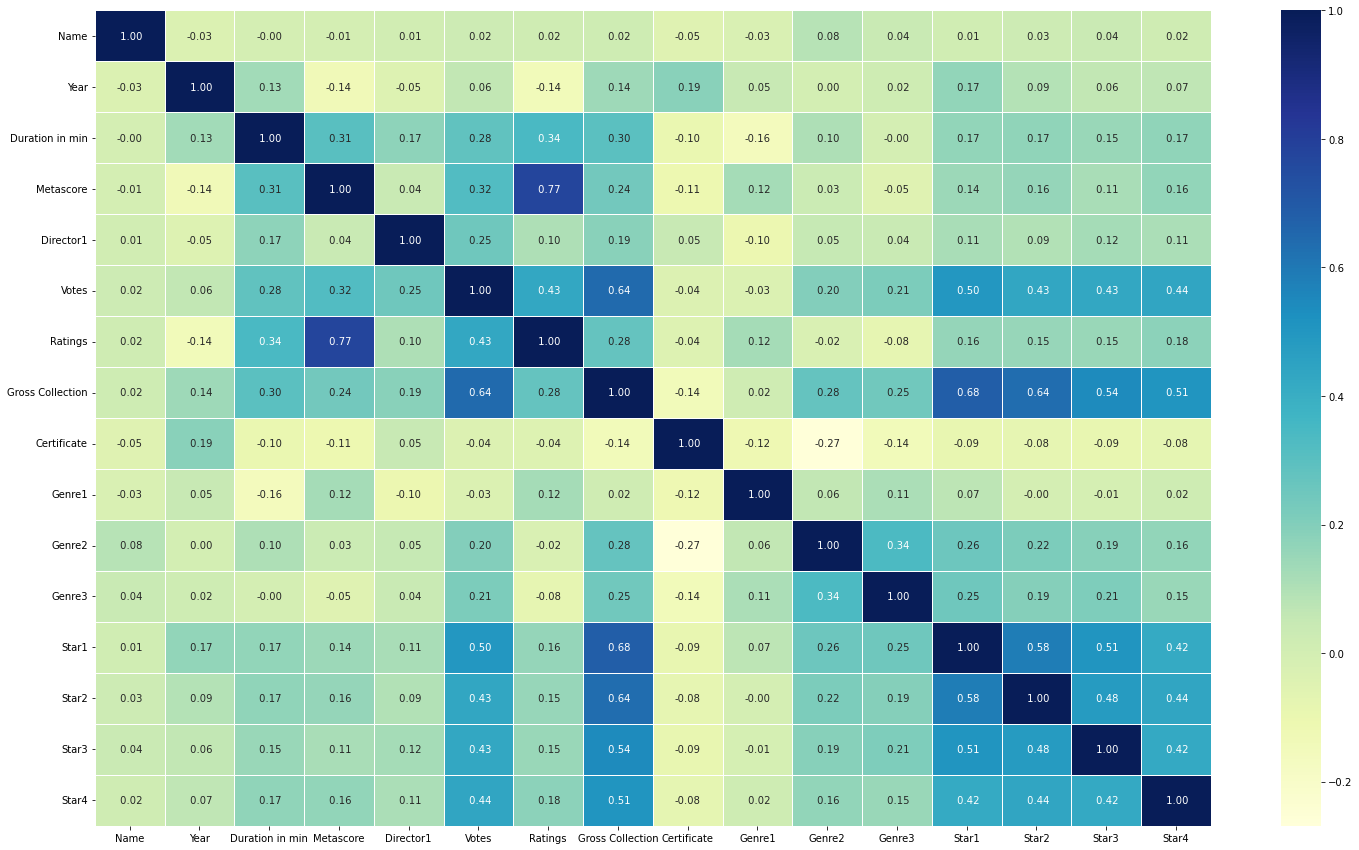

In [116]:
# Lets see the correlation 
plt.figure(figsize=(25,15))
sns.heatmap(df_encoded.corr(),annot= True,linewidths=1,fmt=' .2f',cmap="YlGnBu")
plt.show()

- Here Name, Director1 and Genre1 columns shows very weak correlation with dependent and independent features.
- Even Genre1 column is also showing very weak correlation but Genres are divided into three parts droping one column is not a good dicision because in above analysis we saw that Action Genre has Maximim Gross collection than other Genres and Action Genre count is maximum in Genre1 column dropping it may loss the important information. 
- Here we drop Name because they are not adding that much values in our dataset.

In [117]:
df_encoded.drop(['Director1','Name'],axis = 1,inplace = True)

In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a new dataframe with all the features (numeric and categorical)
X = df_encoded[['Year','Duration in min','Votes','Ratings','Metascore']]

# Calculate VIF values for each featur
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF values for each feature
print(vif)


           Feature         VIF
0             Year   70.955628
1  Duration in min   34.624847
2            Votes    1.987576
3          Ratings  117.792384
4        Metascore   28.396253


In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a new dataframe with all the features (numeric and categorical)
X = df_encoded[['Duration in min','Votes','Year','Metascore']]

# Calculate VIF values for each feature
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF values for each feature
print(vif)

           Feature        VIF
0  Duration in min  34.103507
1            Votes   1.853382
2             Year  33.815869
3        Metascore  13.394582


In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a new dataframe with all the features (numeric and categorical)
X = df_encoded[['Votes','Duration in min','Metascore']]

# Calculate VIF values for each feature
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF values for each feature
print(vif)

           Feature        VIF
0            Votes   1.768961
1  Duration in min  11.488085
2        Metascore  11.954398


- Here we choose to drop Rating and Metascore to avoid multicollinearity. Also Year showing very weak correlation with dependent and independent features hence we choose to drop it. Again We have very high VIF but duration shows quit high positive correlation with target column so we are not choose to drop any other feature right now. Also we are not getting strong relation with certificate and gross collection hence choose to drop that.

In [121]:
df_encoded.drop(['Metascore','Year','Certificate','Ratings'],axis = 1, inplace = True)

In [122]:
df_encoded.head(5)

,Duration in min,Votes,Gross Collection,Genre1,Genre2,Genre3,Star1,Star2,Star3,Star4
0,152,2689187,534.86,75.380803,45.090208,66.332436,165.875309,210.466437,75.712986,214.154041
1,201,1869233,377.85,75.380803,109.599300,66.332436,211.068870,140.037902,185.131777,271.197395
2,178,1898603,315.54,75.380803,109.599300,66.332436,211.068870,270.918476,200.862813,166.376671
3,148,2386600,292.58,75.380803,109.599300,117.428072,139.946978,146.630796,75.712986,186.288557
4,179,1687619,342.55,75.380803,109.599300,66.332436,211.068870,270.918476,157.644193,271.197395


# Ckeking for Outliers

In [123]:
# calculate the interquartile range (IQR)
Q1 = df_encoded['Votes'].quantile(0.25)
Q3 = df_encoded['Votes'].quantile(0.75)
IQR = Q3 - Q1

# calculate the upper and lower bounds for outliers
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

# count the number of outliers
outliers = df_encoded.loc[(df['Votes'] < lower_bound) | (df_encoded['Votes'] > upper_bound)]
outliers['Votes']

0       2689187
1       1869233
2       1898603
3       2386600
4       1687619
         ...   
927      491062
989      601415
1056     461642
1148     459454
1289     694400
Name: Votes, Length: 156, dtype: int64

In [124]:
# calculate the interquartile range (IQR)
Q1 = df_encoded['Duration in min'].quantile(0.25)
Q3 = df_encoded['Duration in min'].quantile(0.75)
IQR = Q3 - Q1

# calculate the upper and lower bounds for outliers
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

# count the number of outliers
outliers = df_encoded.loc[(df['Duration in min'] < lower_bound) | (df_encoded['Duration in min'] > upper_bound)]
outliers['Duration in min']

1       201
2       178
4       179
10      207
16      181
25      170
30      175
31      168
34      170
47      321
48      167
51      170
53       45
75      166
76      174
83      242
100     182
103     170
105     187
128     192
130     176
185     178
191     167
234     179
243     210
259     191
271     213
275     172
360     186
362     178
381     187
443     169
470     171
476     174
479     168
480     171
540     173
542     170
543     179
603     174
692     191
996     177
1052    183
1058    169
1182    177
1451    175
1503    167
1555    172
1642    180
1659    178
Name: Duration in min, dtype: int64

In [125]:
# calculate the interquartile range (IQR)
Q1 = df_encoded['Gross Collection'].quantile(0.25)
Q3 = df_encoded['Gross Collection'].quantile(0.75)
IQR = Q3 - Q1

# calculate the upper and lower bounds for outliers
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

# count the number of outliers
outliers = df_encoded.loc[(df['Gross Collection'] < lower_bound) | (df_encoded['Gross Collection'] > upper_bound)]
outliers['Gross Collection']

0       534.86
1       377.85
2       315.54
3       292.58
4       342.55
         ...  
1296    402.11
1442    376.85
1443    277.48
1447    245.44
1626    300.53
Name: Gross Collection, Length: 142, dtype: float64

- Here We are not dealing with outliers.
- We can see if we remove the ouliers we loss the maximum Gross Collections, Durations and Votes which will be a good factor for prediction. 

In [126]:
# Lets see the skewness 
df_encoded.skew()

Duration in min     1.490240
Votes               3.799526
Gross Collection    3.248097
Genre1              4.737902
Genre2              0.179165
Genre3              0.877862
Star1               3.566437
Star2               4.371014
Star3               4.134677
Star4               4.705252
dtype: float64

- Here we can see Ratings and Certificates are skewed towords left and other columns skewd toword right.

In [127]:
# Divide the data into features and vectors.
X=df_encoded.drop(['Gross Collection'], axis=1)
y=df_encoded['Gross Collection'] 


In [128]:
X[0:2]

,Duration in min,Votes,Genre1,Genre2,Genre3,Star1,Star2,Star3,Star4
0,152,2689187,75.380803,45.090208,66.332436,165.875309,210.466437,75.712986,214.154041
1,201,1869233,75.380803,109.599300,66.332436,211.068870,140.037902,185.131777,271.197395


In [129]:
y[0:2]

0    534.86
1    377.85
Name: Gross Collection, dtype: float64

In [130]:
X=np.log(X)

In [131]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the scaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
X = scaler.fit_transform(X)

In [132]:
from scipy.stats import skew
skewness = skew(X)
print("Skewness:", skewness)

Skewness: [ 0.54749483  0.48918808  4.73378127 -0.03245506  0.24648708 -0.30469998
 -0.16302721  0.30207748  0.39702061]


C:\Users\pooja sinalkar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

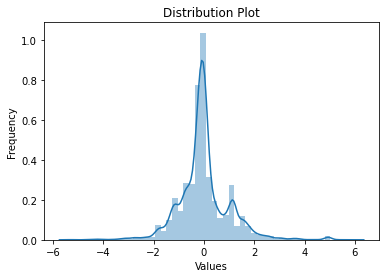

In [133]:
# create a distplot
sns.distplot(X, kde=True, hist=True)

# set the title and axis labels
plt.title('Distribution Plot')
plt.xlabel('Values')
plt.ylabel('Frequency')


In [134]:
# Split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,y,train_size=0.80,random_state=0)

In [135]:
print(x_train.shape)
print(y_train.shape)

(1380, 9)
(1380,)


In [136]:
print(x_test.shape)
print(y_test.shape)

(345, 9)
(345,)


# Model building

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Load your data into X and y variables here

# Define a range of random state values to try
random_states = np.arange(100)

# Initialize variables to keep track of the best model and its performance
best_r2_score = -np.inf
best_random_state = None
best_model = None

# Loop through all the random state values to find the best one
for random_state in random_states:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Fit a linear regression model to the training data
    model = LinearRegression().fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Compute the R-squared score for this model
    r2 = r2_score(y_test, y_pred)

    # Check if this model has a better R-squared score than the previous best model
    if r2 > best_r2_score:
        best_r2_score = r2
        best_random_state = random_state
        best_model = model

# Print the best random state and its corresponding R-squared score
print("Best random state:", best_random_state)
print("Best R-squared score:", best_r2_score)

Best random state: 2
Best R-squared score: 0.6809114364785933


In [138]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=2)

In [139]:
from sklearn.model_selection import cross_val_score
best_cv = None
best_score = 0

for cv in range(3, 11):
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
    cv_score = cv_scores.mean()
    print('{} at this fold score is {}'.format(cv,cv_score))


3 at this fold score is 0.3099746194378439
4 at this fold score is 0.3562991996275778
5 at this fold score is 0.3622187296880356
6 at this fold score is 0.3742528116153477
7 at this fold score is 0.34709978894005683
8 at this fold score is 0.36021860892412344
9 at this fold score is 0.38035258237533626
10 at this fold score is 0.39128212506025273


- We can see at 10 fold we get best r2 score than other fold.

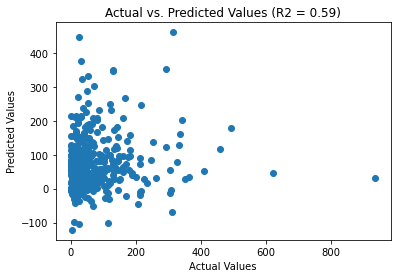

In [140]:
plt.scatter(y_test, y_pred)
plt.title('Actual vs. Predicted Values (R2 = {:.2f})'.format(r2))
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


# Lasso regression

In [141]:
from sklearn.linear_model import Lasso
lasso = Lasso()

# Fit a linear regression model
lasso_reg = lasso.fit(x_train, y_train)

# Predict on test data
lasso_y_pred = lasso.predict(x_test)

r2 = r2_score(y_test,lasso_y_pred)

print("R2 Score", r2)

R2 Score 0.6795107846746777


In [142]:
# Evaluate model performance using cross-validation
cv_scores = cross_val_score(lasso, X, y, cv=10, scoring='r2')
# Print the mean and standard deviation of the mean squared error
print(cv_scores.mean())

0.400476687865


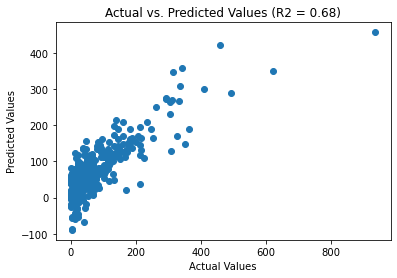

In [143]:
plt.scatter(y_test, lasso_y_pred)
plt.title('Actual vs. Predicted Values (R2 = {:.2f})'.format(r2))
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


# Ridge regression

In [144]:
from sklearn.linear_model import Ridge
# Define Ridge model with cross-validation
ridge = Ridge()

# Fit a linear regression model
ridge_reg = ridge.fit(x_train, y_train)

# Predict on test data
ridge_y_pred = ridge.predict(x_test)

r2 = r2_score(y_test, ridge_y_pred)

print(r2)

0.6808904497133488


In [145]:
# Evaluate model performance using cross-validation
cv_scores = cross_val_score(ridge,X, y, cv=10, scoring='r2')
cv_mean = np.mean(cv_scores)

print(cv_mean)

0.3914185112323268


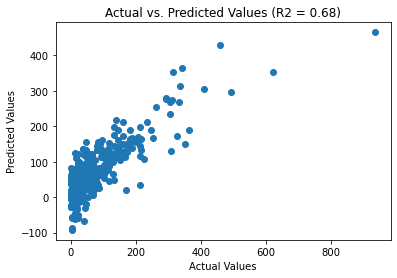

In [146]:
plt.scatter(y_test, ridge_y_pred)
plt.title('Actual vs. Predicted Values (R2 = {:.2f})'.format(r2))
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


# KNN

In [147]:
from sklearn.neighbors import KNeighborsRegressor
# Define KNeighborsRegressor model with cross-validation
knn = KNeighborsRegressor()
knn_reg = knn.fit(x_train,y_train)
# Predict on test data
knn_y_pred = knn.predict(x_test)

r2 = r2_score(y_test, knn_y_pred)

print('R2 score', r2)

R2 score 0.7111103540486456


In [148]:
# Evaluate model performance using cross-validation
cv_scores = cross_val_score(knn, X, y, cv=10, scoring='r2')
cv_mean = np.mean(cv_scores)
cv_mean

0.5473628735865818

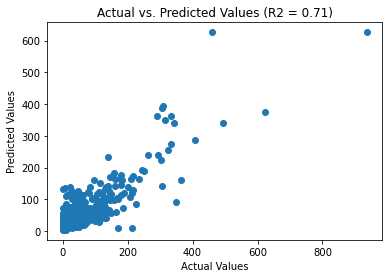

In [149]:
plt.scatter(y_test, knn_y_pred)
plt.title('Actual vs. Predicted Values (R2 = {:.2f})'.format(r2))
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


# SVR

In [150]:
from sklearn.svm import SVR

# Define the SVR model
svr = SVR(kernel='linear')

# Fit the model on the training data
svr.fit(x_train, y_train)

# Make predictions on the testing data
svr_y_pred = svr.predict(x_test)

# Compute the R2 score for this model
r2 = r2_score(y_test, svr_y_pred)

# Print the R2 score
print("R2 score:", r2)

R2 score: 0.5875190611062389


In [151]:
# Evaluate model performance using cross-validation
cv_scores = cross_val_score(svr, X, y, cv=10, scoring='r2')
cv_mean = np.mean(cv_scores)
cv_mean

0.4521443704097489

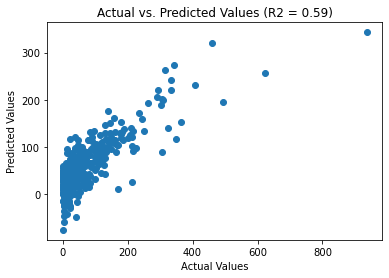

In [152]:
plt.scatter(y_test, svr_y_pred)
plt.title('Actual vs. Predicted Values (R2 = {:.2f})'.format(r2))
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


# Decision Tree Regressor

In [153]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt_reg = dt.fit(x_train, y_train)
dt_y_pred=dt.predict(x_test)

r2 = r2_score(y_test, dt_y_pred)

print("R2 score",r2)

R2 score 0.4210154603689209


In [154]:
# Evaluate model performance using cross-validation
cv_scores = cross_val_score(dt, X, y, cv=10, scoring='r2')
cv_mean = np.mean(cv_scores)
cv_mean

0.15031062602772688

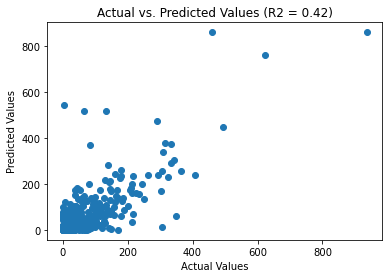

In [155]:
plt.scatter(y_test, dt_y_pred)
plt.title('Actual vs. Predicted Values (R2 = {:.2f})'.format(r2))
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


# Random Forest regressor

In [156]:
from sklearn.ensemble import RandomForestRegressor

# Define Random Forest Regressor model
rf = RandomForestRegressor()

# Fit the model on training data
rf_reg = rf.fit(x_train, y_train)

# Make predictions on test set
rf_y_pred = rf.predict(x_test)

r2 = r2_score(y_test, rf_y_pred)

print("R2 score:", r2)

R2 score: 0.7434981733871773


In [157]:
# Evaluate model performance using cross-validation
cv_scores = cross_val_score(knn, X, y, cv=10, scoring='r2')
cv_mean = np.mean(cv_scores)
cv_mean

0.5473628735865818

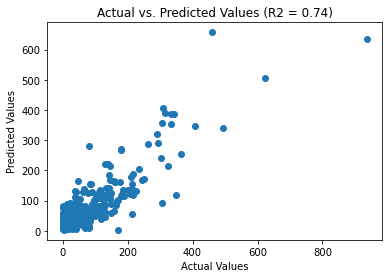

In [158]:
plt.scatter(y_test, rf_y_pred)
plt.title('Actual vs. Predicted Values (R2 = {:.2f})'.format(r2))
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Gradient Boosting

In [159]:
from sklearn.ensemble import GradientBoostingRegressor

# Define Gradient Boosting model with cross-validation
gb = GradientBoostingRegressor(random_state=2)
gb_reg = gb.fit(x_train, y_train)
gb_y_pred = gb.predict(x_test)

r2 = r2_score(y_test, gb_y_pred)

print("R2 score:", r2)

# Evaluate model performance using cross-validation
cv_scores = cross_val_score(gb, X, y, cv=10, scoring='r2')
cv_mean = np.mean(cv_scores)
print("cv_mean",cv_mean)

R2 score: 0.7464302893047672
cv_mean 0.5961705856076501


- For R2 score, a higher value indicates a better model fit. R2 score measures how well the model explains the variance in the target variable. So, if we have an R2 score, the cross-validation score to be close to the R2 score or at least not significantly lower than the R2 score.
- KNN shows less difference in r2 score and cv score. Lets do the hyper parameter tuning on it.

# Hyper parameter tuning for KNN

In [160]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.5),
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform random search cross-validation to find the best hyperparameters
gb_random = RandomizedSearchCV(gb, param_distributions=param_grid, cv=10, scoring='r2', n_iter=50, random_state=2)
gb_random.fit(x_train, y_train)

# Print the best hyperparameters and their corresponding R2 score
print("Best hyperparameters:", gb_random.best_params_)
print("Best R2 score:", gb_random.best_score_)


Best hyperparameters: {'learning_rate': 0.09073328144583835, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 17, 'n_estimators': 68}
Best R2 score: 0.6579392168113822


In [161]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

# Define HistGradientBoostingRegressor model
hgb = HistGradientBoostingRegressor(random_state=2)

# Define the hyperparameter grid to search over
param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [1, 3, 5, 9],
    'min_samples_leaf': [1, 3, 5]
}

# Perform grid search cross-validation to find the best hyperparameters
hgb_grid = GridSearchCV(hgb, param_grid, cv=10, scoring='r2')
hgb_grid.fit(x_train, y_train)

# Print the best hyperparameters and their corresponding R2 score
print("Best hyperparameters:", hgb_grid.best_params_)
print("Best R2 score:", hgb_grid.best_score_)

# Evaluate the model on the test data
hgb_y_pred = hgb_grid.predict(x_test)
r2 = r2_score(y_test, hgb_y_pred)
print("R2 score:", r2)


C:\Users\pooja sinalkar\anaconda3\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 5}
Best R2 score: 0.6367080922099395
R2 score: 0.7351824515139546


- The corresponding R2 score of the model using these hyperparameters is 0.636, which is the best R2 score achieved by any combination of hyperparameters during the hyperparameter tuning process.


- Then the model was used to make predictions on the test set, and the R2 score was found to be 0.735. This suggests that the model has a good performance on the test set, with an R2 score of 0.735 indicating that 73.5% of the variance in the target variable can be explained by the model.


- In cases where the dataset contains outliers and it is not desirable to remove them, R2 score can be a more suitable metric than mean squared error (MSE). R2 score measures the proportion of variance in the target variable that is explained by the model, and is less sensitive to outliers than MSE.


- HistGradientBoostingRegressor is a gradient boosting algorithm for regression tasks, introduced in Scikit-learn version 0.23. It is based on histograms and gradient boosting, which makes it very fast and scalable for large datasets. Instead of using decision trees, HistGradientBoostingRegressor builds histograms of the features, and computes the gradients based on these histograms. It also uses the L2 regularization to avoid overfitting.


- In our case after doing hyper parameter r2 score get reduced hence we used HistGradientBoostingRegressor.

In [162]:
# Save the best model
import joblib
joblib.dump(hgb_grid.best_estimator_, 'best_model.pkl')

['best_model.pkl']

#  To Predict Ratings

In [163]:
New_df

,Name,Year,Duration in min,Metascore,Director1,Votes,Ratings,Gross Collection,Certificate,Genre1,Genre2,Genre3,Star1,Star2,Star3,Star4
0,The Dark Knight,2008,152,84,Christopher Nolan,2689187,9.0,534.86,PG 13,Action,Crime,Drama,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine
1,The Lord of the Rings The Return of the King,2003,201,94,Peter Jackson,1869233,9.0,377.85,PG 13,Action,Adventure,Drama,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom
2,The Lord of the Rings The Fellowship of the Ring,2001,178,92,Peter Jackson,1898603,8.8,315.54,PG 13,Action,Adventure,Drama,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean
3,Inception,2010,148,74,Christopher Nolan,2386600,8.8,292.58,PG 13,Action,Adventure,Sci Fi,Leonardo DiCaprio,Joseph Gordon Levitt,Elliot Page,Ken Watanabe
4,The Lord of the Rings The Two Towers,2002,179,87,Peter Jackson,1687619,8.8,342.55,PG 13,Action,Adventure,Drama,Elijah Wood,Ian McKellen,Viggo Mortensen,Orlando Bloom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,Radhe,2021,135,15,Prabhu Deva,178384,1.9,5.97,TV MA,Action,Crime,Thriller,Salman Khan,Disha Patani,Randeep Hooda,Jackie Shroff
1721,Race 3,2018,160,15,Souza,47237,1.9,1.69,Not Rated,Action,Crime,Thriller,Anil Kapoor,Salman Khan,Bobby Deol,Jacqueline Fernandez
1722,Angels Apocalypse,2015,85,15,Sean Cain,42900,1.6,1.69,Not Rated,Action,Fantasy,Sci Fi,Enzo Zelocchi,Jana Rochelle,Ryan C.F. Buckley,William Kirkham
1723,The Cost of Deception,2021,125,15,Keith English,39237,1.5,1.69,Not Rated,Action,Crime,Drama,Vivianne Bánovits,András Mózes,Barna Bokor,Gabriella Gubás


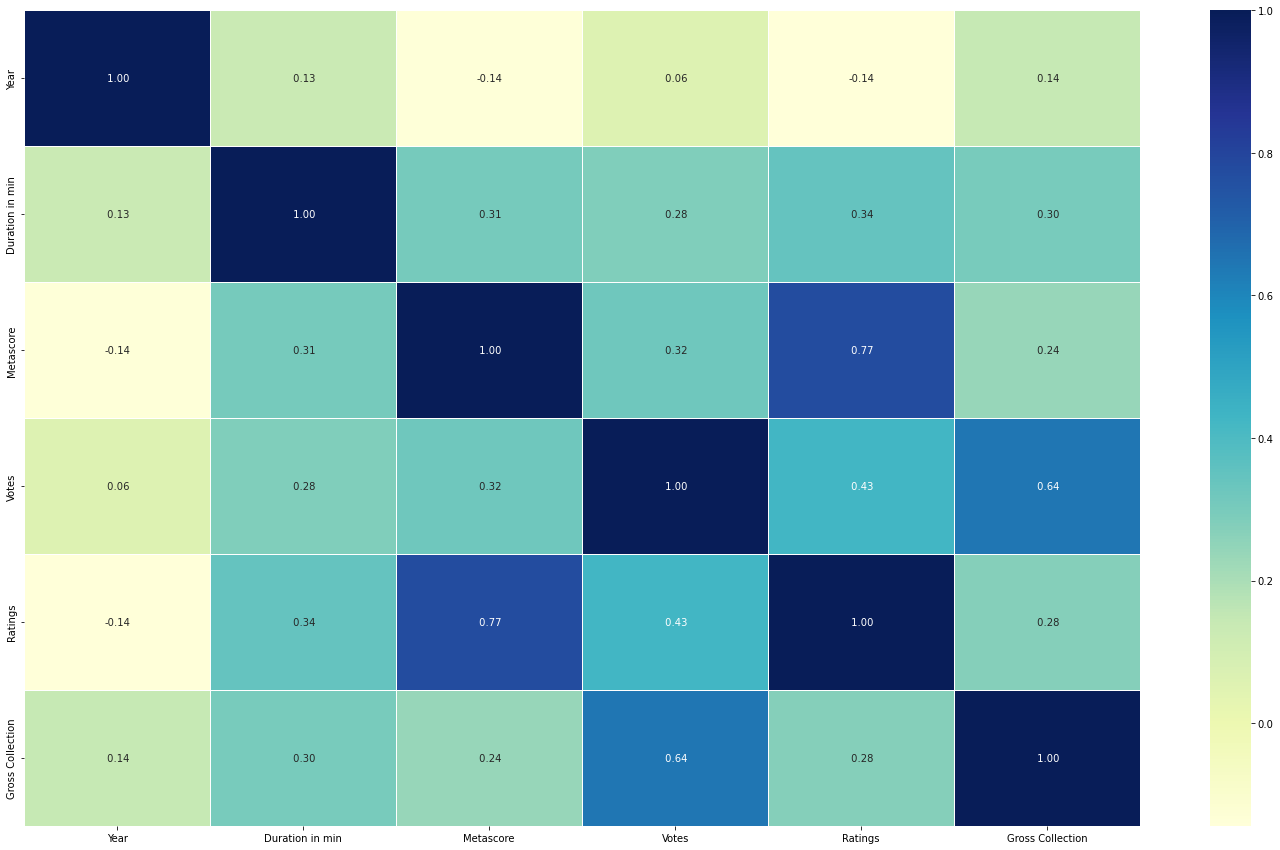

In [164]:
# Lets see the correlation 
plt.figure(figsize=(25,15))
sns.heatmap(New_df.corr(),annot= True,linewidths=1,fmt=' .2f',cmap="YlGnBu")
plt.show()

- Year column showing weak correlation with dependent and independent column hence choose to drop it.

In [165]:
New_df.drop('Year',axis = 1, inplace = True)

In [166]:
# Get the sorted list of directors by frequency count
sorted_directors = New_df['Director1'].value_counts().sort_values(ascending=False)

# Group the DataFrame by Director1 and calculate the sum of Gross Collection for each director
director_rating = New_df.groupby('Director1')['Ratings'].sum()

# Select only the directors whose names are in the sorted_directors index
sorted_director_rating = director_rating.loc[sorted_directors.index]

# Display the sorted list of directors with their gross collection
sorted_director_rating

Michael Bay          96.3
Robert Rodriguez     77.2
Steven Spielberg     94.3
Tony Scott           87.9
Antoine Fuqua        80.4
                     ... 
Ellory Elkayem        5.5
Fran Rubel Kuzui      5.6
Mathieu Kassovitz     5.5
Adam Shankman         5.6
Mahesh Bhatt          1.2
Name: Ratings, Length: 916, dtype: float64

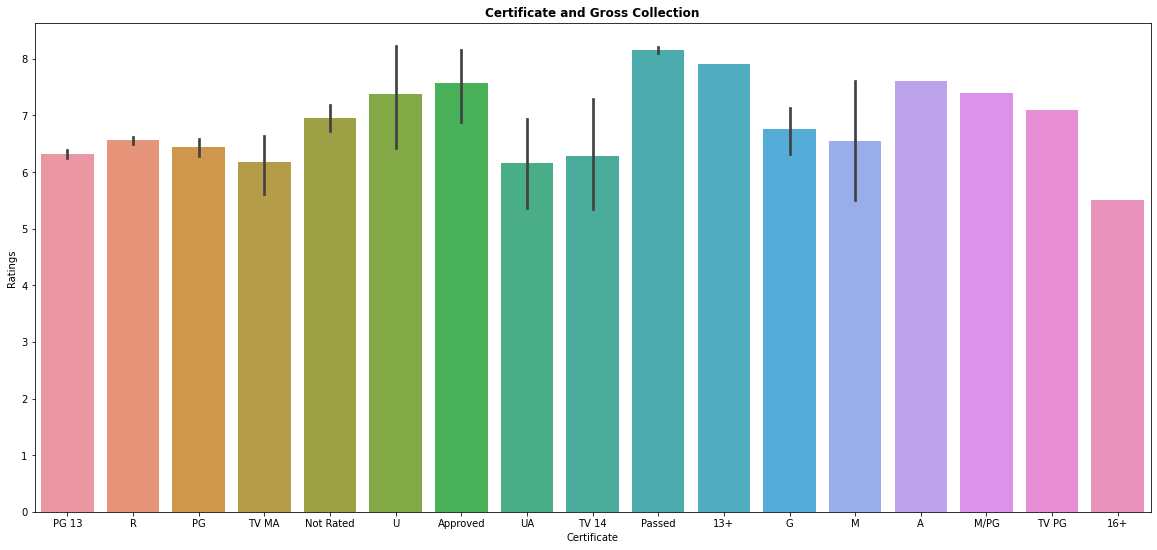

In [167]:
plt.figure(figsize=(20, 9))
g=sns.barplot(x=New_df['Certificate'],y=New_df['Ratings'])
g.set_title("Certificate and Gross Collection", weight = "bold")
plt.show()

- We can see movies rating are showing strong relation with certificates. If movie is not awarded by any certificate then also its rating is greater than 6.5 which we can say medium rating according to range. 

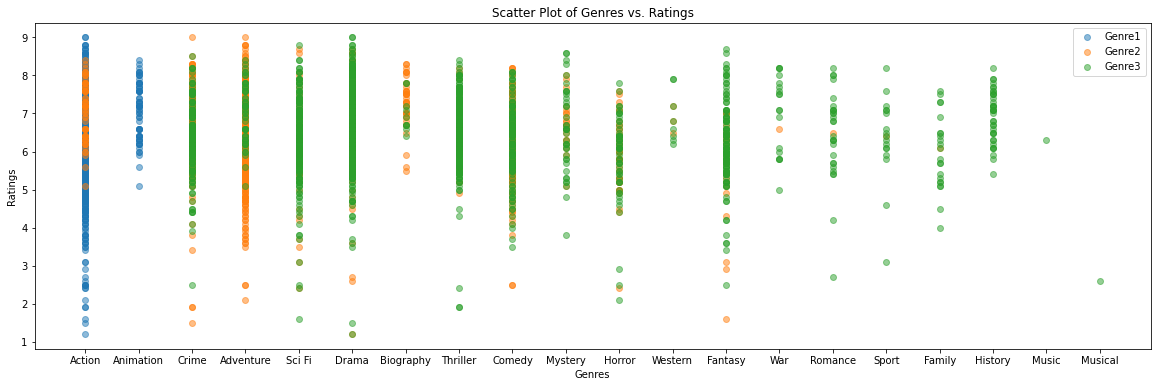

In [168]:
plt.figure(figsize=(20,6))
# Create scatter plot for Genre1
plt.scatter(df['Genre1'], df['Ratings'], alpha=0.5, label='Genre1')

# Create scatter plot for Genre2
plt.scatter(df['Genre2'], df['Ratings'], alpha=0.5, label='Genre2')

# Create scatter plot for Genre3
plt.scatter(df['Genre3'], df['Ratings'], alpha=0.5, label='Genre3')

# Add labels and title
plt.xlabel('Genres')
plt.ylabel('Ratings')
plt.title('Scatter Plot of Genres vs. Ratings')

# Add legend
plt.legend()

# Show plot
plt.show()


- We can see here Genre shows good relationship with ratings.

In [169]:
import category_encoders as ce
# Define the target column
target_col = "Ratings"

# Define the categorical columns to be encoded
cat_cols = ["Genre1", "Genre2", "Genre3", "Star1", "Star2", "Star3", "Star4"]

# Create an instance of TargetEncoder and fit it on the data
te = ce.TargetEncoder(cols=cat_cols)
te.fit(New_df, New_df[target_col])

# Apply the encoding on the categorical columns
df_encoded = te.transform(New_df)

# Print the encoded DataFrame
df_encoded.head()


C:\Users\pooja sinalkar\anaconda3\lib\site-packages\category_encoders\target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\pooja sinalkar\anaconda3\lib\site-packages\category_encoders\target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


,Name,Duration in min,Metascore,Director1,Votes,Ratings,Gross Collection,Certificate,Genre1,Genre2,Genre3,Star1,Star2,Star3,Star4
0,The Dark Knight,152,84,Christopher Nolan,2689187,9.0,534.86,PG 13,6.454798,6.604154,6.691102,7.321940,7.260925,6.479594,7.994923
1,The Lord of the Rings The Return of the King,201,94,Peter Jackson,1869233,9.0,377.85,PG 13,6.454798,6.398251,6.691102,7.835172,7.143485,7.495804,7.906843
2,The Lord of the Rings The Fellowship of the Ring,178,92,Peter Jackson,1898603,8.8,315.54,PG 13,6.454798,6.398251,6.691102,7.835172,8.259162,7.730683,6.937966
3,Inception,148,74,Christopher Nolan,2386600,8.8,292.58,PG 13,6.454798,6.398251,6.313004,7.523049,7.152465,6.479594,6.996686
4,The Lord of the Rings The Two Towers,179,87,Peter Jackson,1687619,8.8,342.55,PG 13,6.454798,6.398251,6.691102,7.835172,8.259162,7.115912,7.906843


In [170]:
import category_encoders as ce
# Encode the Name and Director1 columns using FrequencyEncoder
fe = ce.CountEncoder(cols=["Director1"])
df_encoded = fe.fit_transform(df_encoded)

# Print the encoded DataFrame
df_encoded.head()

,Name,Duration in min,Metascore,Director1,Votes,Ratings,Gross Collection,Certificate,Genre1,Genre2,Genre3,Star1,Star2,Star3,Star4
0,The Dark Knight,152,84,6,2689187,9.0,534.86,PG 13,6.454798,6.604154,6.691102,7.321940,7.260925,6.479594,7.994923
1,The Lord of the Rings The Return of the King,201,94,4,1869233,9.0,377.85,PG 13,6.454798,6.398251,6.691102,7.835172,7.143485,7.495804,7.906843
2,The Lord of the Rings The Fellowship of the Ring,178,92,4,1898603,8.8,315.54,PG 13,6.454798,6.398251,6.691102,7.835172,8.259162,7.730683,6.937966
3,Inception,148,74,6,2386600,8.8,292.58,PG 13,6.454798,6.398251,6.313004,7.523049,7.152465,6.479594,6.996686
4,The Lord of the Rings The Two Towers,179,87,4,1687619,8.8,342.55,PG 13,6.454798,6.398251,6.691102,7.835172,8.259162,7.115912,7.906843


In [171]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder and fit it on the data
le = LabelEncoder()
df_encoded['Certificate'] = le.fit_transform(df_encoded['Certificate'])

In [172]:
df_encoded['Name'] = le.fit_transform(df_encoded['Name'])

In [173]:
df_encoded.head(1)

,Name,Duration in min,Metascore,Director1,Votes,Ratings,Gross Collection,Certificate,Genre1,Genre2,Genre3,Star1,Star2,Star3,Star4
0,1309,152,84,6,2689187,9.0,534.86,9,6.454798,6.604154,6.691102,7.32194,7.260925,6.479594,7.994923


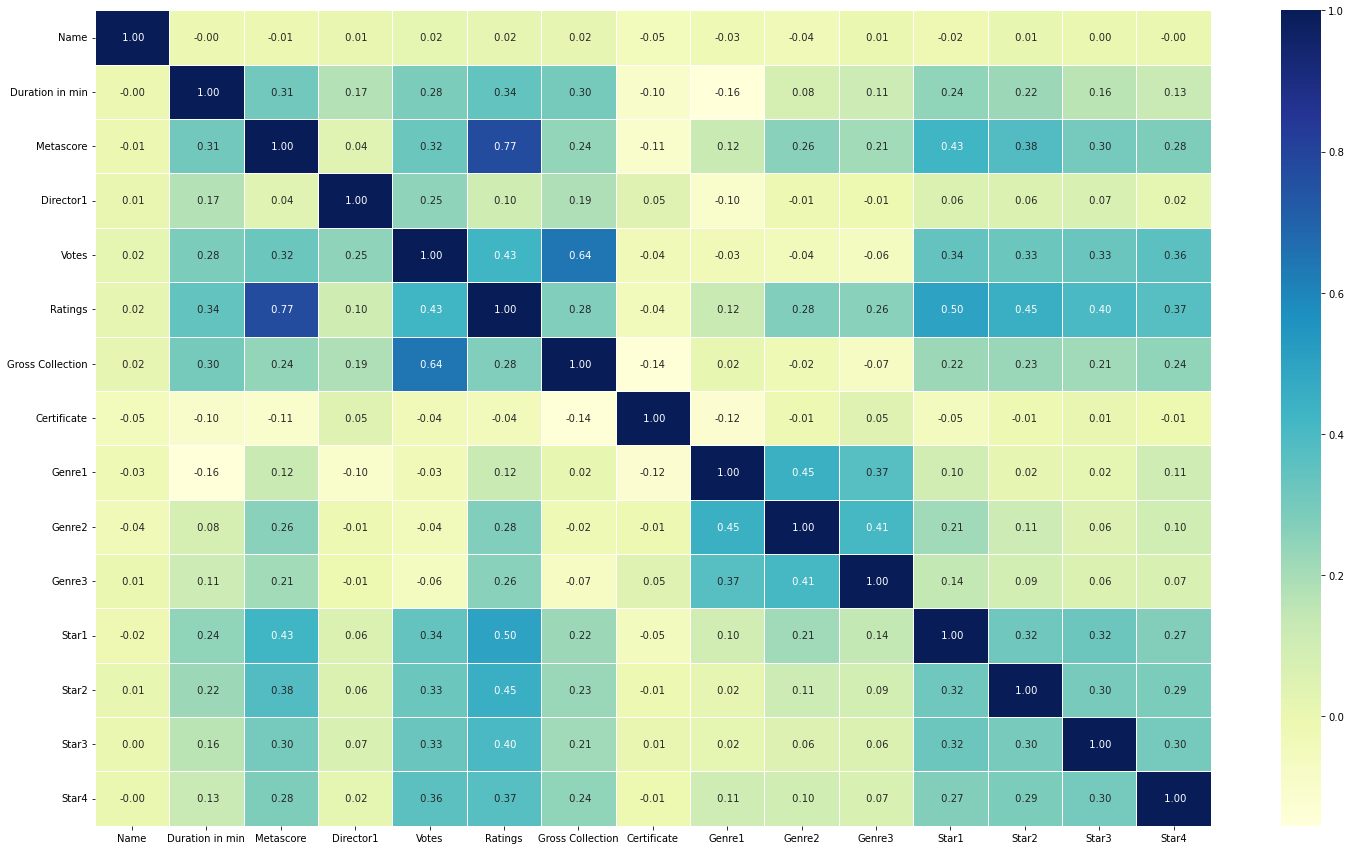

In [174]:
# Lets see the correlation 
plt.figure(figsize=(25,15))
sns.heatmap(df_encoded.corr(),annot= True,linewidths=1,fmt=' .2f',cmap="YlGnBu")
plt.show()

In [175]:
df_encoded.drop(['Name','Certificate'],axis = 1, inplace = True)

In [176]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a new dataframe with all the features (numeric and categorical)
X = df_encoded[['Duration in min','Votes','Metascore','Gross Collection']]

# Calculate VIF values for each featur
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF values for each feature
print(vif)


            Feature        VIF
0   Duration in min  11.706260
1             Votes   2.846141
2         Metascore  11.962752
3  Gross Collection   2.718190


In [177]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a new dataframe with all the features (numeric and categorical)
X = df_encoded[['Votes','Metascore','Gross Collection']]

# Calculate VIF values for each featur
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF values for each feature
print(vif)

            Feature       VIF
0             Votes  2.840866
1         Metascore  1.883301
2  Gross Collection  2.667530


In [178]:
df_encoded.drop('Duration in min',axis = 1,inplace = True)

In [179]:
list(df_encoded['Ratings'].unique())

[9.0,
 8.8,
 8.7,
 8.6,
 8.5,
 8.4,
 8.3,
 8.2,
 8.1,
 8.0,
 7.9,
 7.8,
 7.7,
 7.6,
 7.5,
 7.4,
 7.3,
 7.2,
 7.1,
 7.0,
 6.9,
 6.8,
 6.7,
 6.6,
 6.5,
 6.4,
 6.3,
 6.2,
 6.1,
 6.0,
 5.9,
 5.8,
 5.7,
 5.6,
 5.5,
 5.4,
 5.3,
 5.2,
 5.1,
 5.0,
 4.9,
 4.8,
 4.7,
 4.6,
 4.5,
 4.4,
 4.3,
 4.2,
 4.1,
 4.0,
 3.9,
 3.8,
 3.7,
 3.6,
 3.5,
 3.4,
 3.1,
 2.9,
 2.7,
 2.6,
 2.5,
 2.4,
 2.1,
 1.9,
 1.6,
 1.5,
 1.2]

- Here we convert choose to convert certain ranges into classes and try to solve this problem using classification to reduce the complexity of problem which may occur during prediction if we solve it by regression problem.

In [180]:
# Define the rating ranges and corresponding labels
ranges = [(1.0, 1.9), (2.0, 2.9), (3.0, 3.9), (4.0, 4.9), (5.0, 5.9), (6.0, 6.9), (7.0, 7.9), (8.0, 8.9), (9.0, 9.9)]
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# Create a function to assign labels based on the rating ranges
def assign_label(rating):
    for i, r in enumerate(ranges):
        if rating >= r[0] and rating <= r[1]:
            return labels[i]
    return None

# Apply the function to create a new column with the labels
df_encoded['Ratings'] = df_encoded['Ratings'].apply(assign_label)

# Print the resulting DataFrame with labels
df_encoded.head()


,Metascore,Director1,Votes,Ratings,Gross Collection,Genre1,Genre2,Genre3,Star1,Star2,Star3,Star4
0,84,6,2689187,9,534.86,6.454798,6.604154,6.691102,7.321940,7.260925,6.479594,7.994923
1,94,4,1869233,9,377.85,6.454798,6.398251,6.691102,7.835172,7.143485,7.495804,7.906843
2,92,4,1898603,8,315.54,6.454798,6.398251,6.691102,7.835172,8.259162,7.730683,6.937966
3,74,6,2386600,8,292.58,6.454798,6.398251,6.313004,7.523049,7.152465,6.479594,6.996686
4,87,4,1687619,8,342.55,6.454798,6.398251,6.691102,7.835172,8.259162,7.115912,7.906843


In [181]:
df_encoded.skew()

Metascore           0.001367
Director1           1.536767
Votes               3.799526
Ratings            -0.741801
Gross Collection    3.248097
Genre1              4.737902
Genre2              0.227282
Genre3              0.002025
Star1               0.064938
Star2               0.027576
Star3              -0.090974
Star4               0.295092
dtype: float64

In [182]:
def box_plot(f):
    df_encoded[f].plot.box()
    plt.show()

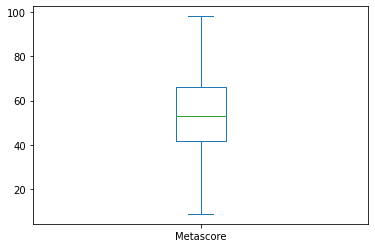

In [183]:
box_plot('Metascore')

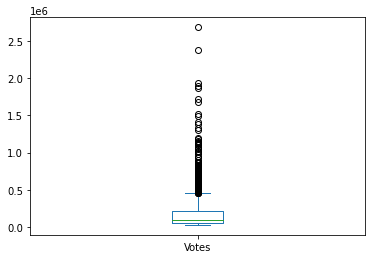

In [184]:
box_plot('Votes')

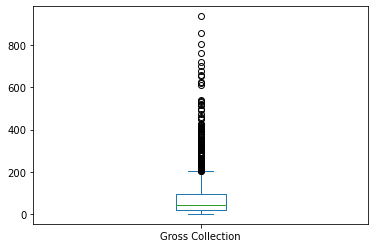

In [185]:
box_plot('Gross Collection')

# Removing outliers

In [186]:
from scipy.stats import zscore
z= np.abs(zscore(df_encoded))

In [187]:
threshold= 3 
print(np.where(z>3))

(array([   0,    0,    0,    1,    1,    1,    1,    2,    2,    2,    2,
          3,    4,    4,    4,    4,    5,    5,    6,    6,    6,    6,
          6,    7,    8,    8,    8,    8,    9,   10,   11,   11,   12,
         13,   14,   15,   16,   16,   16,   17,   18,   18,   18,   19,
         19,   20,   20,   23,   24,   26,   26,   26,   26,   26,   28,
         30,   31,   34,   35,   36,   36,   38,   39,   40,   42,   44,
         45,   46,   48,   48,   48,   49,   50,   51,   55,   57,   58,
         58,   64,   64,   65,   65,   66,   71,   74,   75,   76,   80,
         81,   81,   82,   83,   84,   84,   86,   87,   88,   91,   91,
         91,   92,   93,   94,   97,   98,  102,  102,  106,  106,  108,
        110,  112,  116,  119,  119,  120,  127,  128,  129,  133,  137,
        137,  137,  141,  142,  150,  152,  152,  155,  156,  157,  157,
        165,  174,  179,  183,  189,  190,  197,  206,  206,  209,  212,
        217,  217,  233,  234,  238,  239,  240,  

In [188]:
df2=df_encoded[(z<3).all(axis=1)]
print(df_encoded.shape)
print(df2.shape)

(1725, 12)
(1453, 12)


In [189]:
data_loss = (1725-1453)/1725*100
data_loss

15.768115942028984

In [190]:
# Divide the data into features and vectors.
X=df2.drop(['Ratings'], axis=1)
y=df2['Ratings'] 

In [191]:
X[0:2]

,Metascore,Director1,Votes,Gross Collection,Genre1,Genre2,Genre3,Star1,Star2,Star3,Star4
21,77,2,589266,0.71,6.454798,6.749495,6.570000,6.479594,6.479594,6.479594,6.479594
22,84,6,726481,85.16,6.454798,6.398251,6.313004,6.937966,6.479594,6.479594,6.479594


In [192]:
y[0:2]

21    8
22    8
Name: Ratings, dtype: int64

In [193]:
X=np.sqrt(X)

In [194]:
# Create scaler object and fit to data
scaler = StandardScaler()
scaler.fit(X)

# Transform data
X = scaler.transform(X)

In [195]:
from scipy.stats import skew
skewness = skew(X)
print("Skewness:", skewness)

Skewness: [-0.30408134  0.87195335  1.11732449  0.58462939  0.          0.61890349
 -0.21617074 -0.24054143 -0.14872092 -0.20059316  0.23832835]


In [196]:
skewness = skew(X)
print("Skewness:", skewness)

Skewness: [-0.30408134  0.87195335  1.11732449  0.58462939  0.          0.61890349
 -0.21617074 -0.24054143 -0.14872092 -0.20059316  0.23832835]


C:\Users\pooja sinalkar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

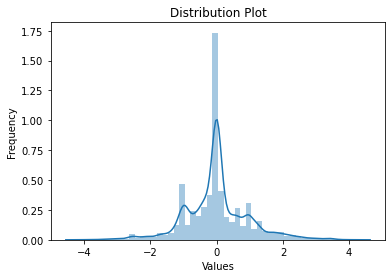

In [197]:
# create a distplot
sns.distplot(X, kde=True, hist=True)

# set the title and axis labels
plt.title('Distribution Plot')
plt.xlabel('Values')
plt.ylabel('Frequency')


In [198]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
best_score = 0
best_rs = 0

# Loop over different random states to find the best one
for rs in range(100):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

    # Create a logistic regression model and fit it to the training data
    clf = LogisticRegression(random_state=rs)
    clf.fit(X_train, y_train)

    # Evaluate the model on the testing data
    score = clf.score(X_test, y_test)

    # Update the best score and random state if necessary
    if score > best_score:
        best_score = score
        best_rs = rs

print(f'Best random state: {best_rs}, Best test score: {best_score:.3f}')


Best random state: 26, Best test score: 0.708


In [199]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
recall = recall_score(y_test, y_pred, average='macro',zero_division=1)
f1 = f1_score(y_test, y_pred, average='macro',zero_division=1)
cm = confusion_matrix(y_test, y_pred)


# Print the evaluation metrics
print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 score: {f1:.3f}')
print('Confusion matrix:')
print(cm)

Accuracy: 0.674
Precision: 0.661
Recall: 0.425
F1 score: 0.431
Confusion matrix:
[[  1   6   2   0   0]
 [  2  32  20   2   0]
 [  0  18 118  12   0]
 [  0   0  25  45   0]
 [  0   0   2   6   0]]


- The overall accuracy of the model is 0.557, which is not very high, indicating that the model is not very accurate in predicting the correct class labels.
- The precision score is 0.394, which means that when the model predicts a class label, it is correct 39.4% of the time on average across all classes.
- The recall score is 0.562, which means that the model correctly identifies only 56.2% of the positive class instances across all classes.
- The F1 score is 0.394, which is a harmonic mean of precision and recall scores, indicating that the model is not performing well on both metrics.
- Overall, while the model may have some predictive power, it is not performing very well on this dataset. Further analysis and improvement of the model may be required.

In [200]:
from sklearn.model_selection import cross_val_score
# Create a logistic regression model
clf = LogisticRegression(random_state=26)

# Perform cross-validation and compute the mean accuracy score
for cv in range(3,9):
    cv_scores = cross_val_score(clf, X, y, cv=cv,scoring = 'accuracy')
    mean_cv_score = cv_scores.mean()
    print("{} at this fold cv_score is {}".format(cv,mean_cv_score))


3 at this fold cv_score is 0.6125457953480447
4 at this fold cv_score is 0.6290716858898677
5 at this fold cv_score is 0.6345277876525655
6 at this fold cv_score is 0.6414708249725085
7 at this fold cv_score is 0.637979773849339
8 at this fold cv_score is 0.6420716714225001


- At fold 8 we get good accuracy hence we choose 8 as a best fold.

In [201]:
from imblearn.over_sampling import RandomOverSampler

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

# Balance the classes on the training set only
ros = RandomOverSampler(random_state=26)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [202]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier and fit it to the training data
clf = DecisionTreeClassifier(random_state=26)
clf.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted',zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted',zero_division=1)
conf_matrix = confusion_matrix(y_test, y_pred)


# Print the evaluation metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 score: {f1:.3f}")
print("Confusion matrix:")
print(conf_matrix)


Accuracy: 0.550
Precision: 0.549
Recall: 0.550
F1 score: 0.549
Confusion matrix:
[[ 0  0  1  1  1  0]
 [ 1  3  5  5  0  0]
 [ 2  7 35 19  1  0]
 [ 0  0 21 85 27  0]
 [ 0  0  2 26 37  7]
 [ 0  0  1  0  4  0]]


In [203]:
# Perform cross-validation and compute the mean accuracy score
cv_scores = cross_val_score(clf, X, y, cv=8, scoring='accuracy')
mean_cv_score = cv_scores.mean()
mean_cv_score

0.5106664744095684

# Random Forect Classifier

In [204]:
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier and fit it to the training data
rfc = RandomForestClassifier(random_state=26)
rfc.fit(X_train, y_train)

# Evaluate the model on the testing data
score = rfc.score(X_test, y_test)
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted',zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted',zero_division=1)
conf_matrix = confusion_matrix(y_test, y_pred)


# Print the evaluation metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 score: {f1:.3f}")
print("Confusion matrix:")
print(conf_matrix)

Accuracy: 0.684
Precision: 0.683
Recall: 0.684
F1 score: 0.670
Confusion matrix:
[[  0   0   3   0   0   0]
 [  0   2  12   0   0   0]
 [  0   2  42  19   1   0]
 [  0   0  17 105  11   0]
 [  0   0   0  22  49   1]
 [  0   0   0   0   4   1]]


In [205]:
# Perform cross-validation and compute the mean accuracy score
cv_scores = cross_val_score(rfc, X, y, cv=8, scoring='accuracy')
mean_cv_score = cv_scores.mean()
mean_cv_score

0.6420489041345394

In [206]:
from sklearn.svm import SVC
# Create a Support vector classifier and fit it to the training data
svc = SVC(random_state=26)
svc.fit(X_train, y_train)

# Evaluate the model on the testing data
score = svc.score(X_test, y_test)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted',zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted',zero_division=1)
conf_matrix = confusion_matrix(y_test, y_pred)


# Print the evaluation metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 score: {f1:.3f}")
print("Confusion matrix:")
print(conf_matrix)

Accuracy: 0.615
Precision: 0.657
Recall: 0.615
F1 score: 0.629
Confusion matrix:
[[ 1  0  2  0  0  0]
 [ 0  7  7  0  0  0]
 [ 1 16 37  9  1  0]
 [ 1  5 25 82 20  0]
 [ 0  0  1 13 51  7]
 [ 0  0  0  0  4  1]]


In [207]:
# Perform cross-validation and compute the mean accuracy score
cv_scores = cross_val_score(svc, X, y, cv=8, scoring='accuracy')
mean_cv_score = cv_scores.mean()
mean_cv_score

0.6482947301317468

# KNN classifier

In [208]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate the model on the testing data
score = knn.score(X_test, y_test)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted',zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted',zero_division=1)
conf_matrix = confusion_matrix(y_test, y_pred)


# Print the evaluation metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 score: {f1:.3f}")
print("Confusion matrix:")
print(conf_matrix)

Accuracy: 0.546
Precision: 0.573
Recall: 0.546
F1 score: 0.552
Confusion matrix:
[[ 1  0  2  0  0  0]
 [ 1  3  9  1  0  0]
 [ 2 13 33 13  3  0]
 [ 1  3 30 72 27  0]
 [ 0  0  4 15 50  3]
 [ 0  0  0  1  4  0]]


In [209]:
# Perform cross-validation and compute the mean accuracy score
cv_scores = cross_val_score(knn, X, y, cv=8, scoring='accuracy')
mean_cv_score = cv_scores.mean()
mean_cv_score

0.5738874385283226

- As comparing other models Random Forest model perform well. We coose random forest as a best model based on matrices.

In [210]:
from sklearn.model_selection import GridSearchCV

# Create a Random Forest classifier
rfc = RandomForestClassifier(random_state=26)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Perform a grid search with cross-validation
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=8, n_jobs=-1)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print('Best parameters:', grid_search.best_params_)

# Print the accuracy score of the best model
print('Accuracy score:', grid_search.best_score_)


Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Accuracy score: 0.9255514705882353


In [211]:
import pickle

# train your best model and save it
best_model = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=400)
best_model.fit(X_train, y_train)

# save the best model using pickle
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
